In [1]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4603948226782104, 'attack_path_exposure': 0.9348264463432924, 'ROA': 0.9697659132970131, 'risk': 0.9431901373556011}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4542807503335515, 'attack_path_exposure': 0.933710809264223, 'ROA': 0.8804550194683819, 'risk': 0.9569099223197343}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7364291794035274, 'attack_path_exposure': 0.9365137503823221, 'ROA': 0.9942248916217096, 'risk': 1.061993912898598}}


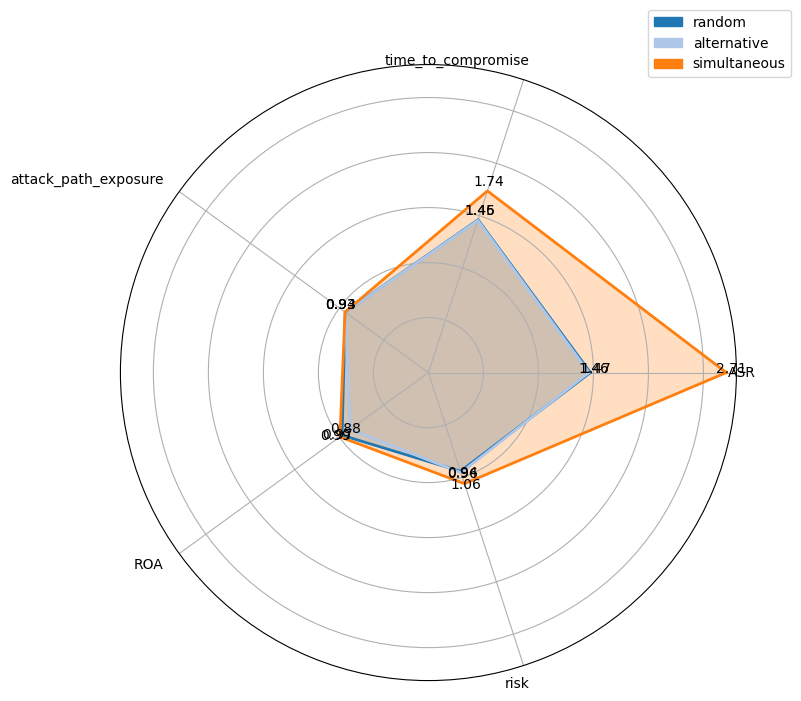

In [3]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [4]:
other_schemes =pd.DataFrame(schemes_data)

In [5]:
other_schemes

,random,alternative,simultaneous
ASR,1.472222,1.458333,2.708333
time_to_compromise,1.460395,1.454281,1.736429
attack_path_exposure,0.934826,0.933711,0.936514
ROA,0.969766,0.880455,0.994225
risk,0.943190,0.956910,1.061994


In [6]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [7]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
mtd_interval,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MEF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ASR,1.527778,1.472222,1.611111,1.500000,1.500000,1.527778,1.472222,1.666667,1.500000,1.500000,...,1.500000,1.472222,1.625000,1.527778,1.500000,1.500000,1.472222,1.611111,1.500000,1.489510
time_to_compromise,1.545631,1.472419,1.512724,1.696604,1.629049,1.535351,1.473507,1.514567,1.704895,1.625636,...,1.526821,1.481007,1.520235,1.724911,1.622033,1.530234,1.467154,1.528115,1.706132,1.609597
host_compromise_ratio,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,...,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826
network_size,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exposed_endpoints,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
attack_path_exposure,2.451284,2.236797,1.903657,2.684156,2.601385,2.460476,2.211664,1.916010,2.659974,2.589975,...,2.440142,2.211664,1.872610,2.689045,2.592249,2.460476,2.211664,1.901963,2.659974,2.589975
ROA,1.128493,1.149689,1.050264,1.152941,1.138042,1.156150,1.078217,1.150830,1.167001,1.122988,...,1.191539,1.087530,1.190861,1.121795,1.064459,1.089260,1.133597,1.066705,1.198155,1.103751
risk,1.039836,1.103160,1.017596,1.069052,1.056053,1.041980,1.046188,1.040440,1.081417,1.046215,...,1.058301,1.005719,1.135306,1.040615,1.010882,1.043271,1.094836,1.012745,1.085041,0.997177


In [8]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [9]:
chart.process_weighted_metrics(other_schemes)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
random,1.472222,1.460395,0.934826,0.969766,0.943190,5.780400,-0.527605,0.055143
alternative,1.458333,1.454281,0.933711,0.880455,0.956910,5.683690,-0.625705,0.000000
simultaneous,2.708333,1.736429,0.936514,0.994225,1.061994,7.437495,1.153311,1.000000


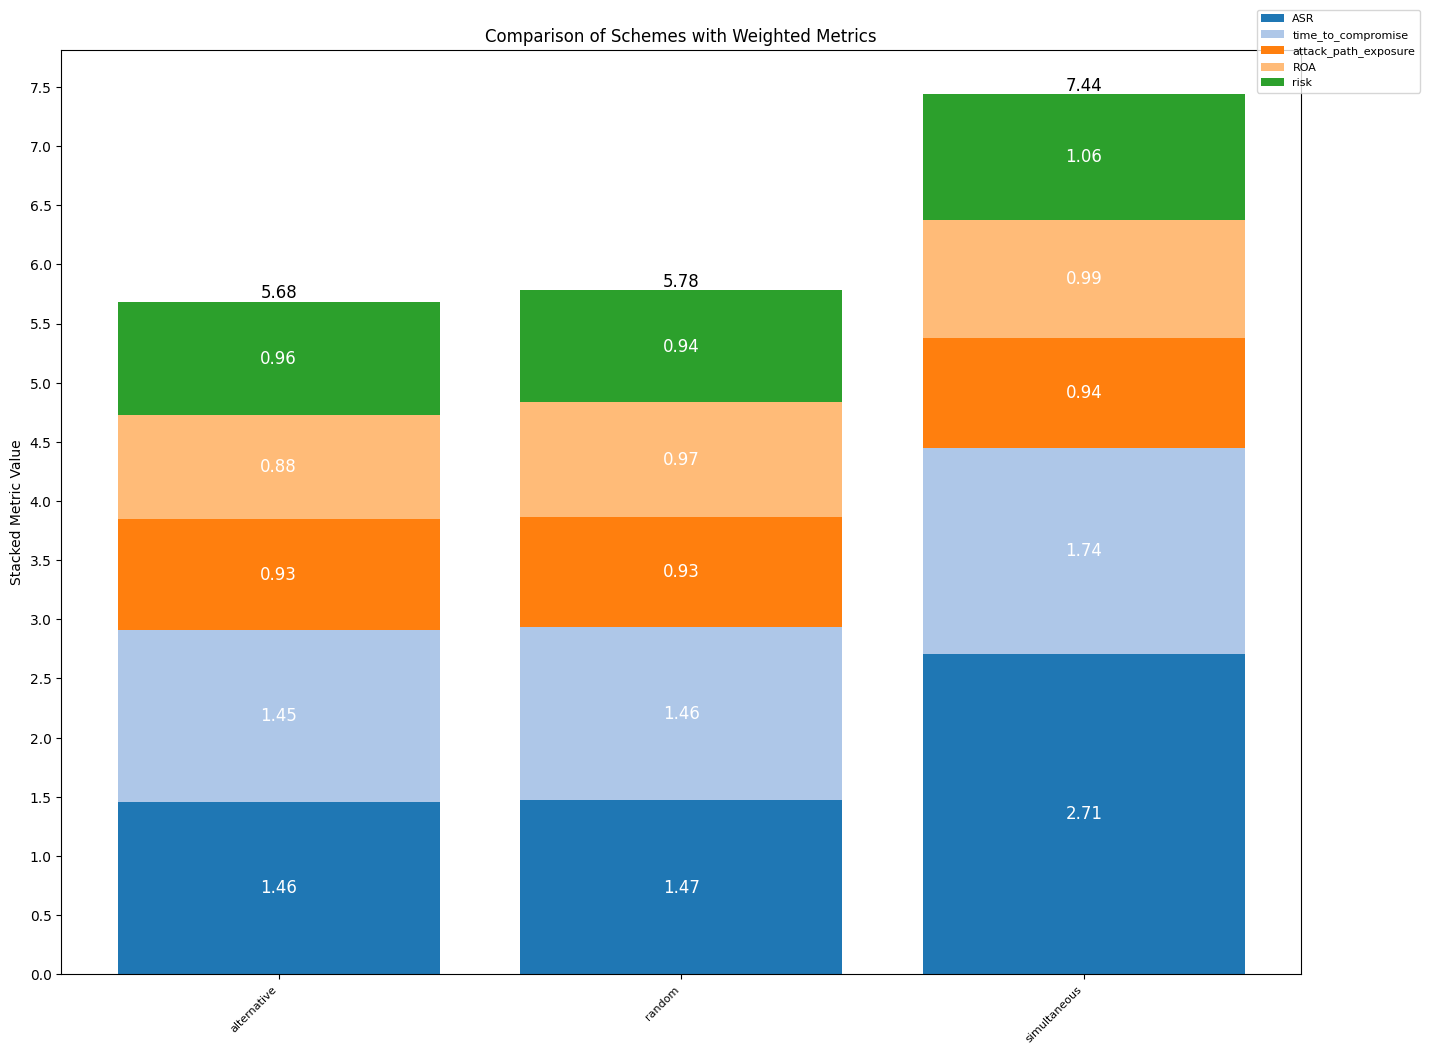

In [10]:
chart.plot_n_schemes()

In [11]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)
chart.process_weighted_metrics(data)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
all_features,1.527778,1.545631,2.451284,1.128493,1.039836,7.693023,0.136662,0.523460
all_features_CompleteTopologyShuffle,1.472222,1.472419,2.236797,1.149689,1.103160,7.434287,-0.602445,0.296851
all_features_IPShuffle,1.611111,1.512724,1.903657,1.050264,1.017596,7.095351,-1.570654,0.000000
all_features_OSDiversity,1.500000,1.696604,2.684156,1.152941,1.069052,8.102752,1.307100,0.882314
all_features_ServiceDiversity,1.500000,1.629049,2.601385,1.138042,1.056053,7.924528,0.797982,0.726219
host_compromise_ratio,1.527778,1.535351,2.460476,1.156150,1.041980,7.721734,0.218680,0.548606
host_compromise_ratio_CompleteTopologyShuffle,1.472222,1.473507,2.211664,1.078217,1.046188,7.281797,-1.038049,0.163296
host_compromise_ratio_IPShuffle,1.666667,1.514567,1.916010,1.150830,1.040440,7.288514,-1.018862,0.169178
host_compromise_ratio_OSDiversity,1.500000,1.704895,2.659974,1.167001,1.081417,8.113288,1.337195,0.891541
host_compromise_ratio_ServiceDiversity,1.500000,1.625636,2.589975,1.122988,1.046215,7.884814,0.684535,0.691437


In [12]:
combined_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity,random,alternative,simultaneous
ASR,1.527778,1.472222,1.611111,1.500000,1.500000,1.527778,1.472222,1.666667,1.500000,1.500000,...,1.527778,1.500000,1.500000,1.472222,1.611111,1.500000,1.489510,1.472222,1.458333,2.708333
time_to_compromise,1.545631,1.472419,1.512724,1.696604,1.629049,1.535351,1.473507,1.514567,1.704895,1.625636,...,1.724911,1.622033,1.530234,1.467154,1.528115,1.706132,1.609597,1.460395,1.454281,1.736429
attack_path_exposure,2.451284,2.236797,1.903657,2.684156,2.601385,2.460476,2.211664,1.916010,2.659974,2.589975,...,2.689045,2.592249,2.460476,2.211664,1.901963,2.659974,2.589975,0.934826,0.933711,0.936514
ROA,1.128493,1.149689,1.050264,1.152941,1.138042,1.156150,1.078217,1.150830,1.167001,1.122988,...,1.121795,1.064459,1.089260,1.133597,1.066705,1.198155,1.103751,0.969766,0.880455,0.994225
risk,1.039836,1.103160,1.017596,1.069052,1.056053,1.041980,1.046188,1.040440,1.081417,1.046215,...,1.040615,1.010882,1.043271,1.094836,1.012745,1.085041,0.997177,0.943190,0.956910,1.061994


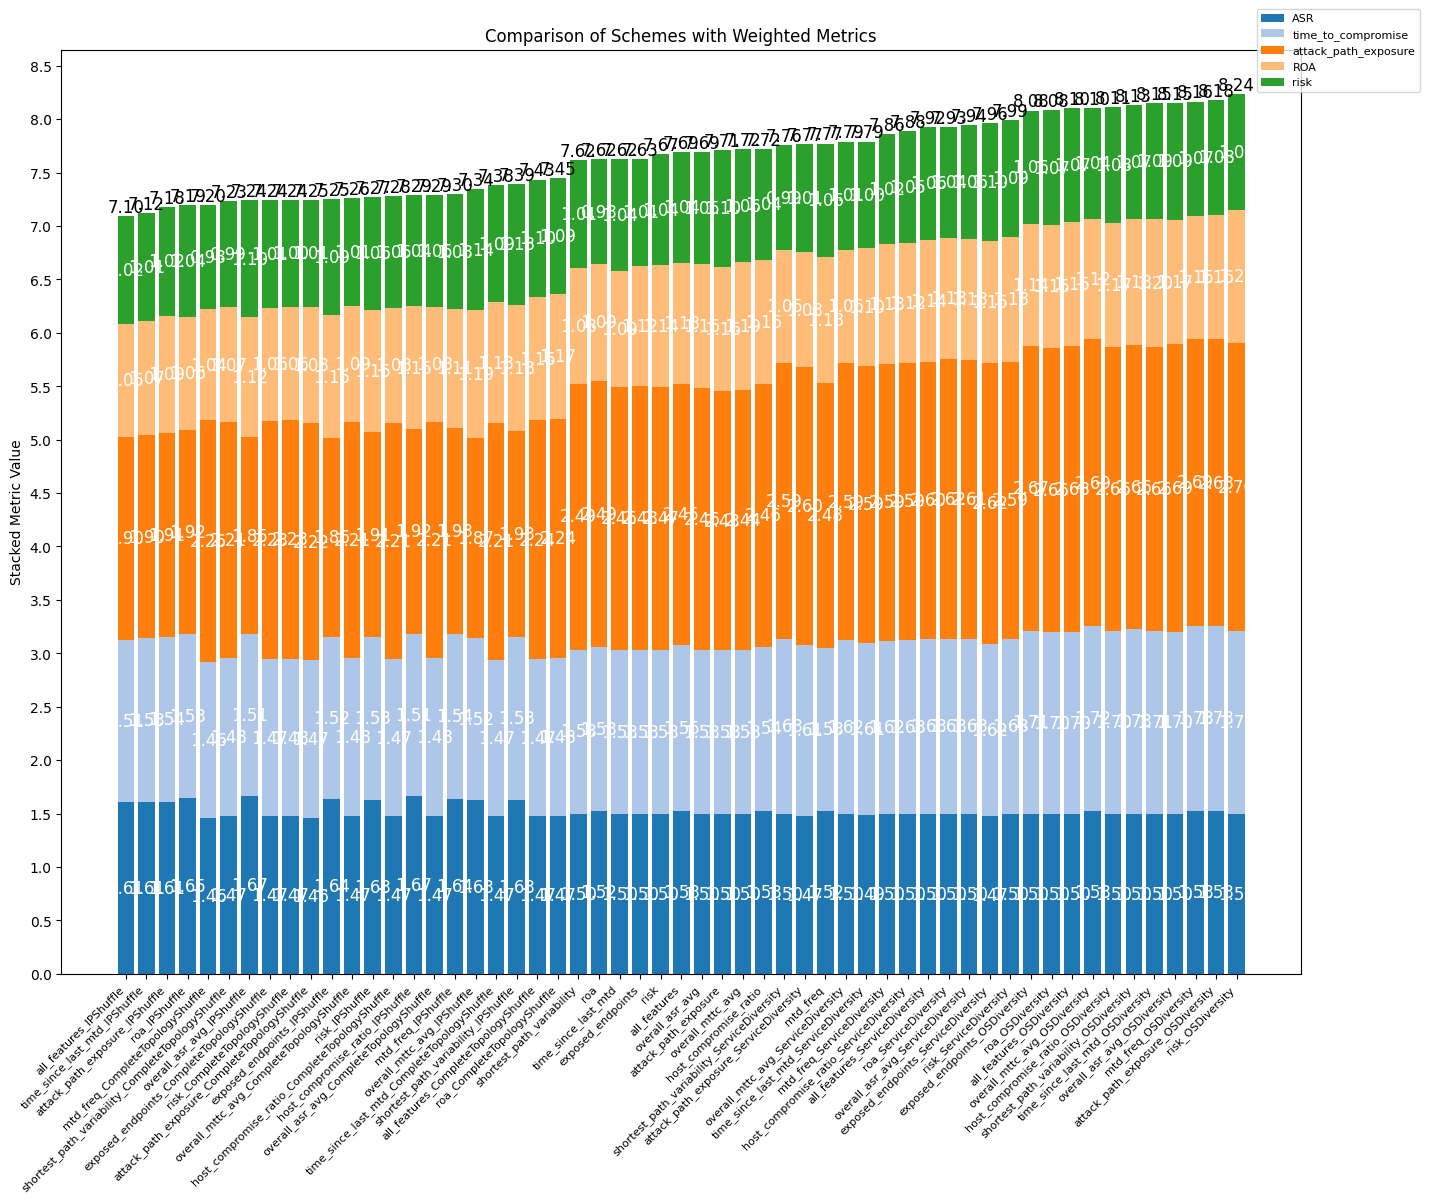

In [13]:
chart.plot_n_schemes()

In [14]:
data = chart.weighted_data.T

<Figure size 1600x1200 with 0 Axes>

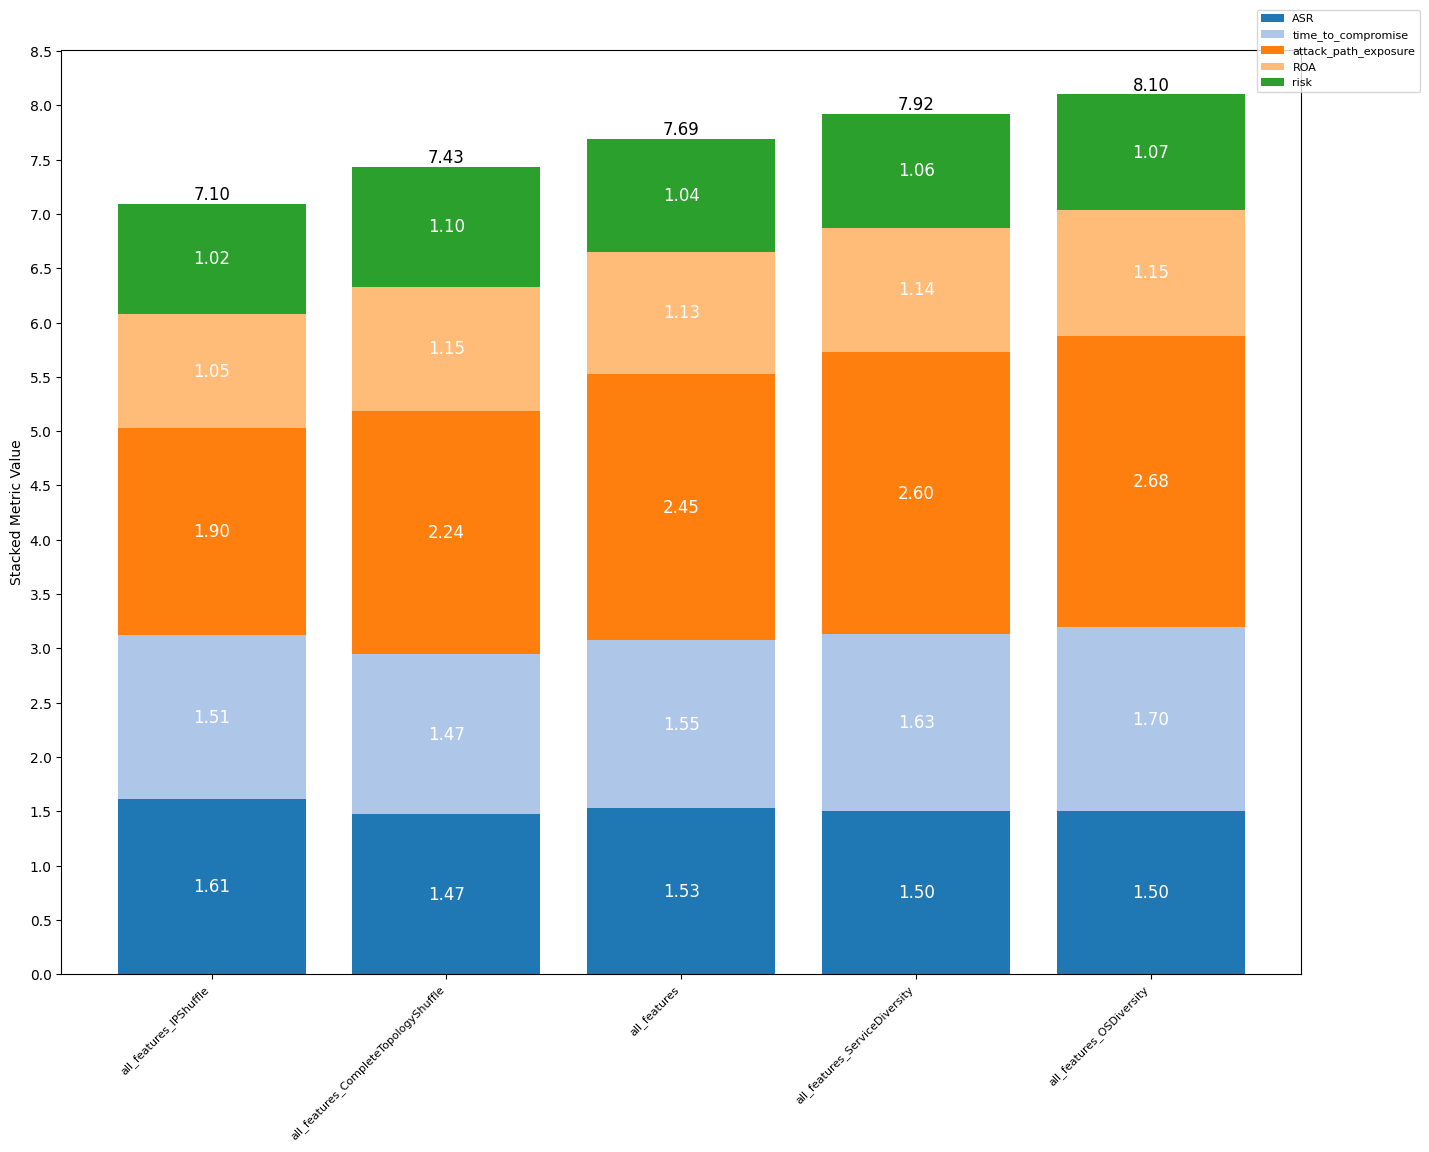

<Figure size 1600x1200 with 0 Axes>

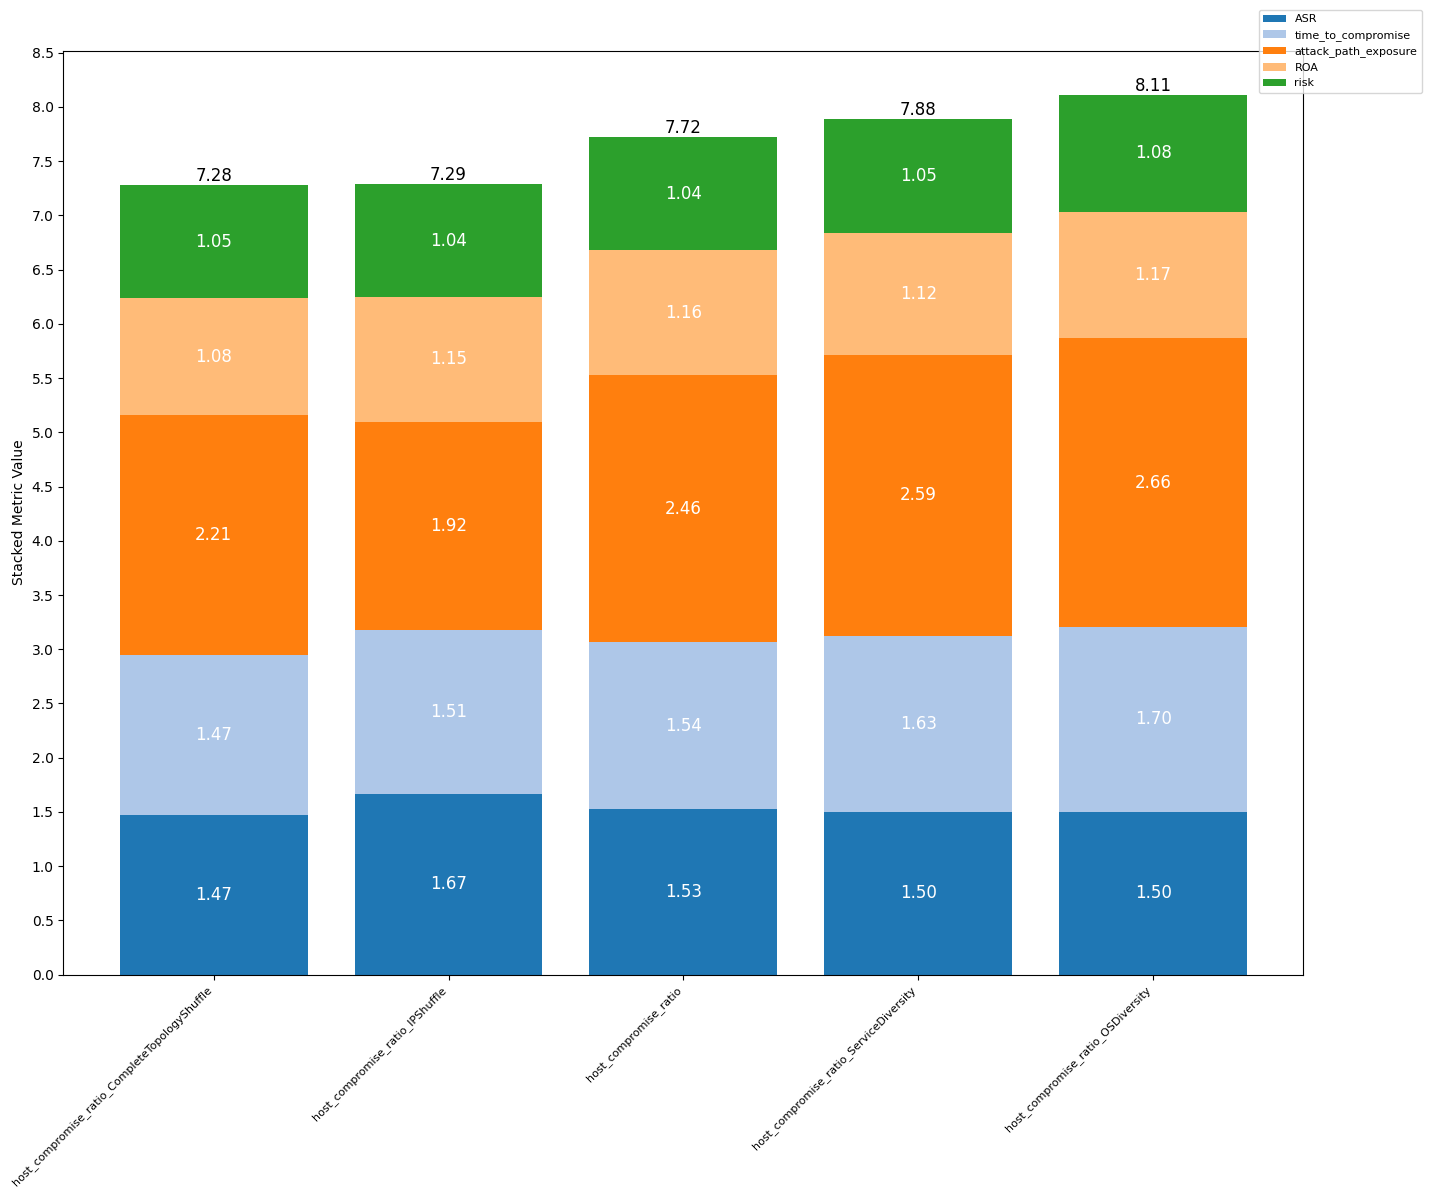

<Figure size 1600x1200 with 0 Axes>

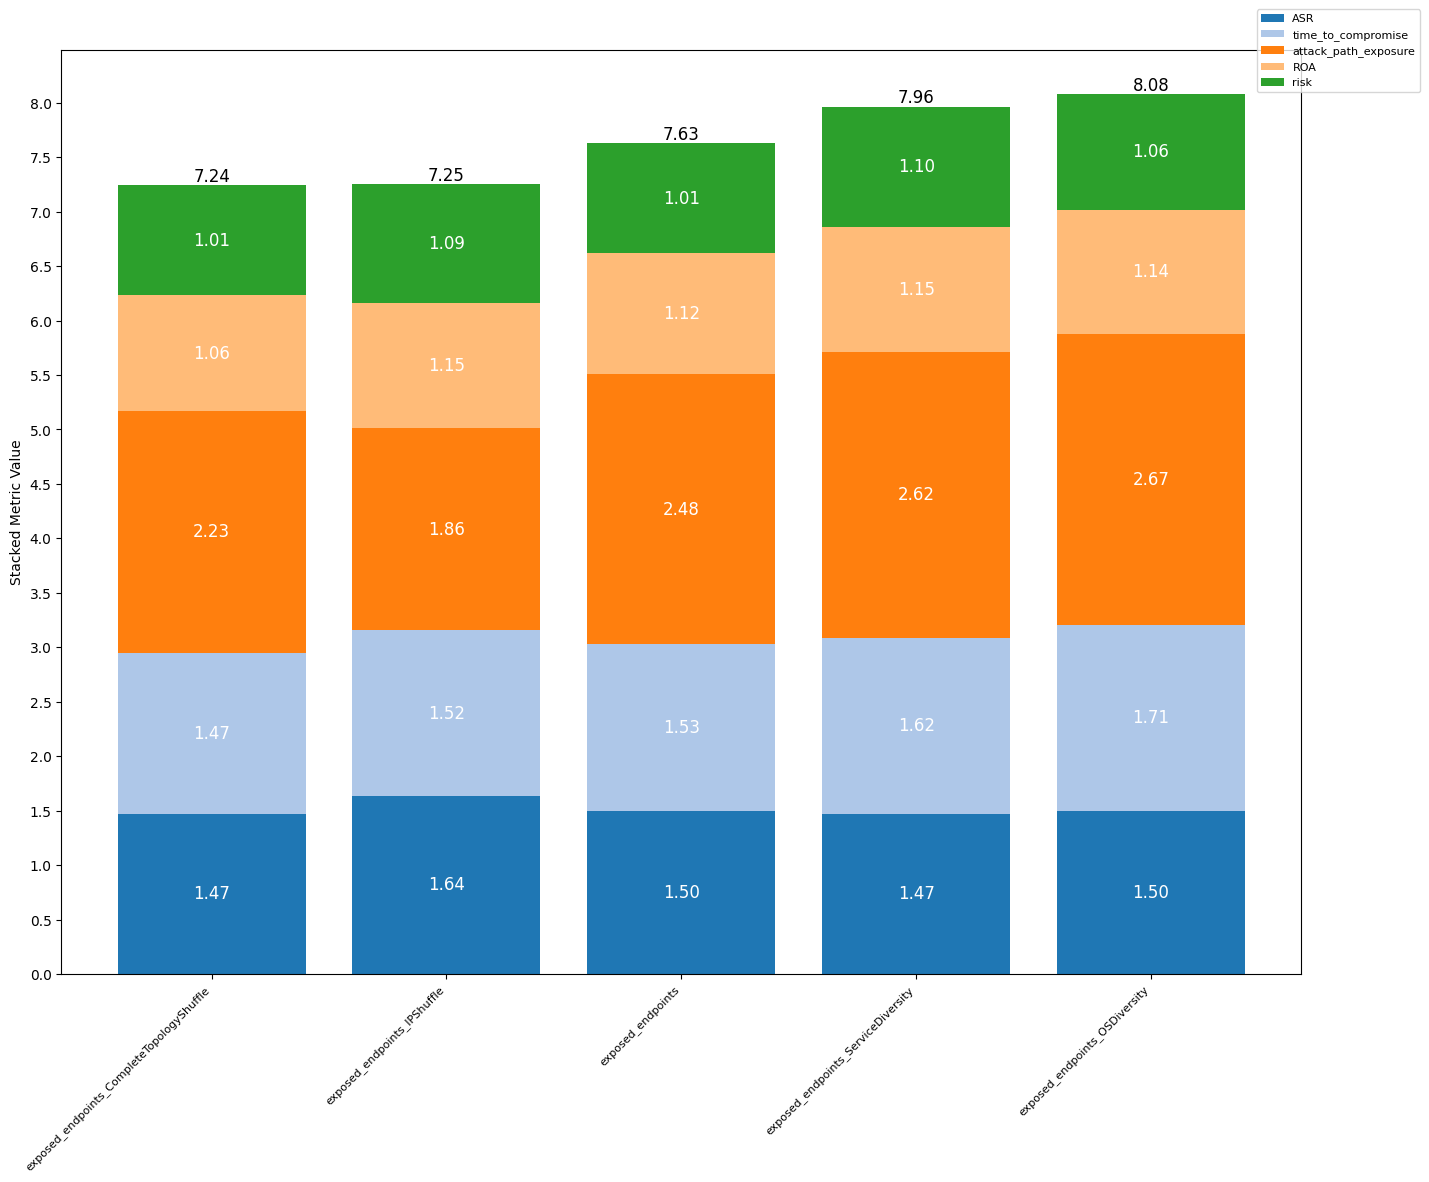

<Figure size 1600x1200 with 0 Axes>

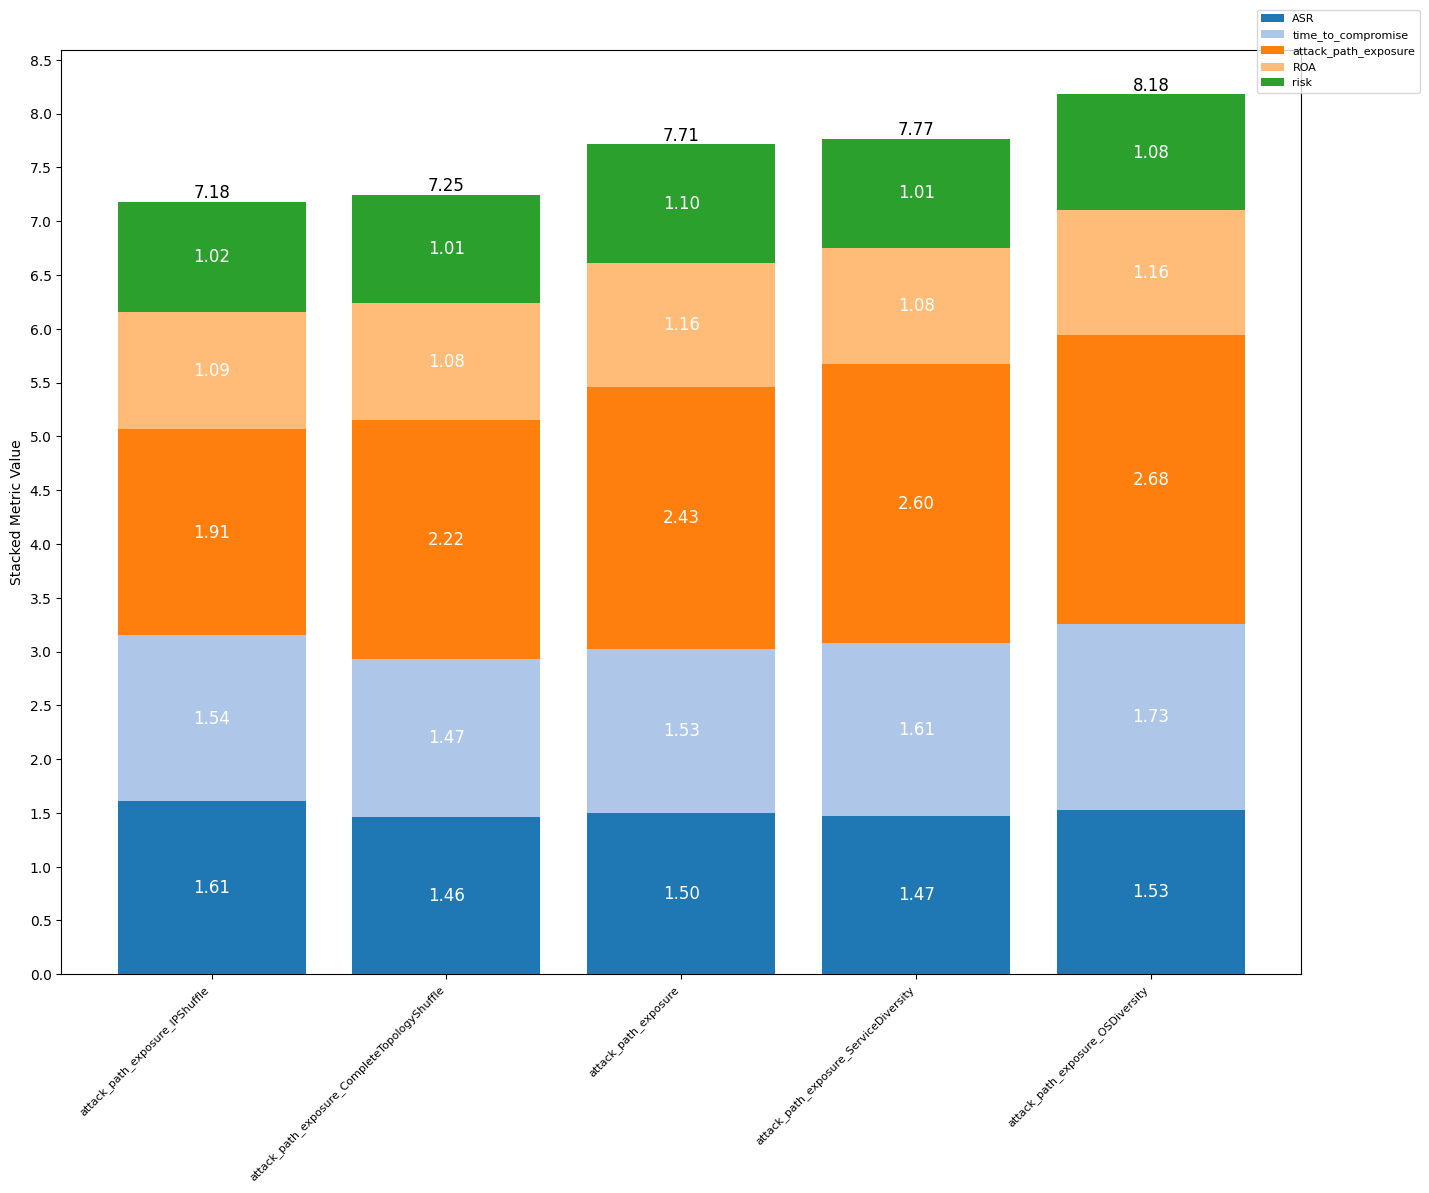

<Figure size 1600x1200 with 0 Axes>

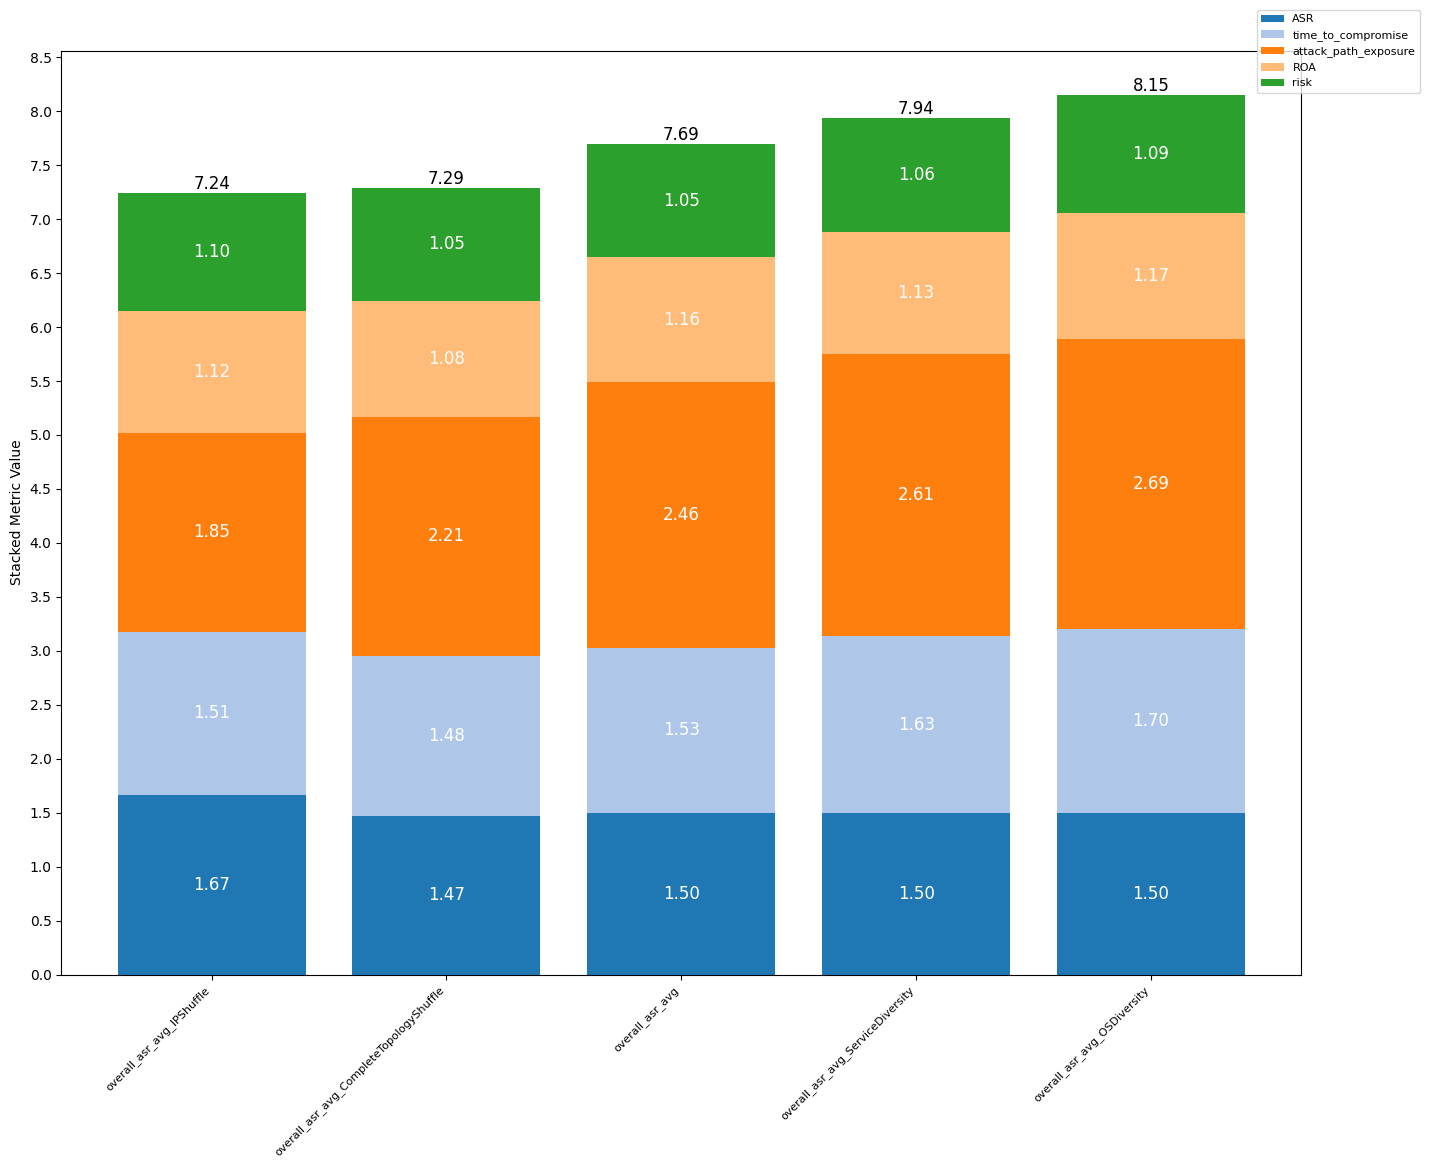

<Figure size 1600x1200 with 0 Axes>

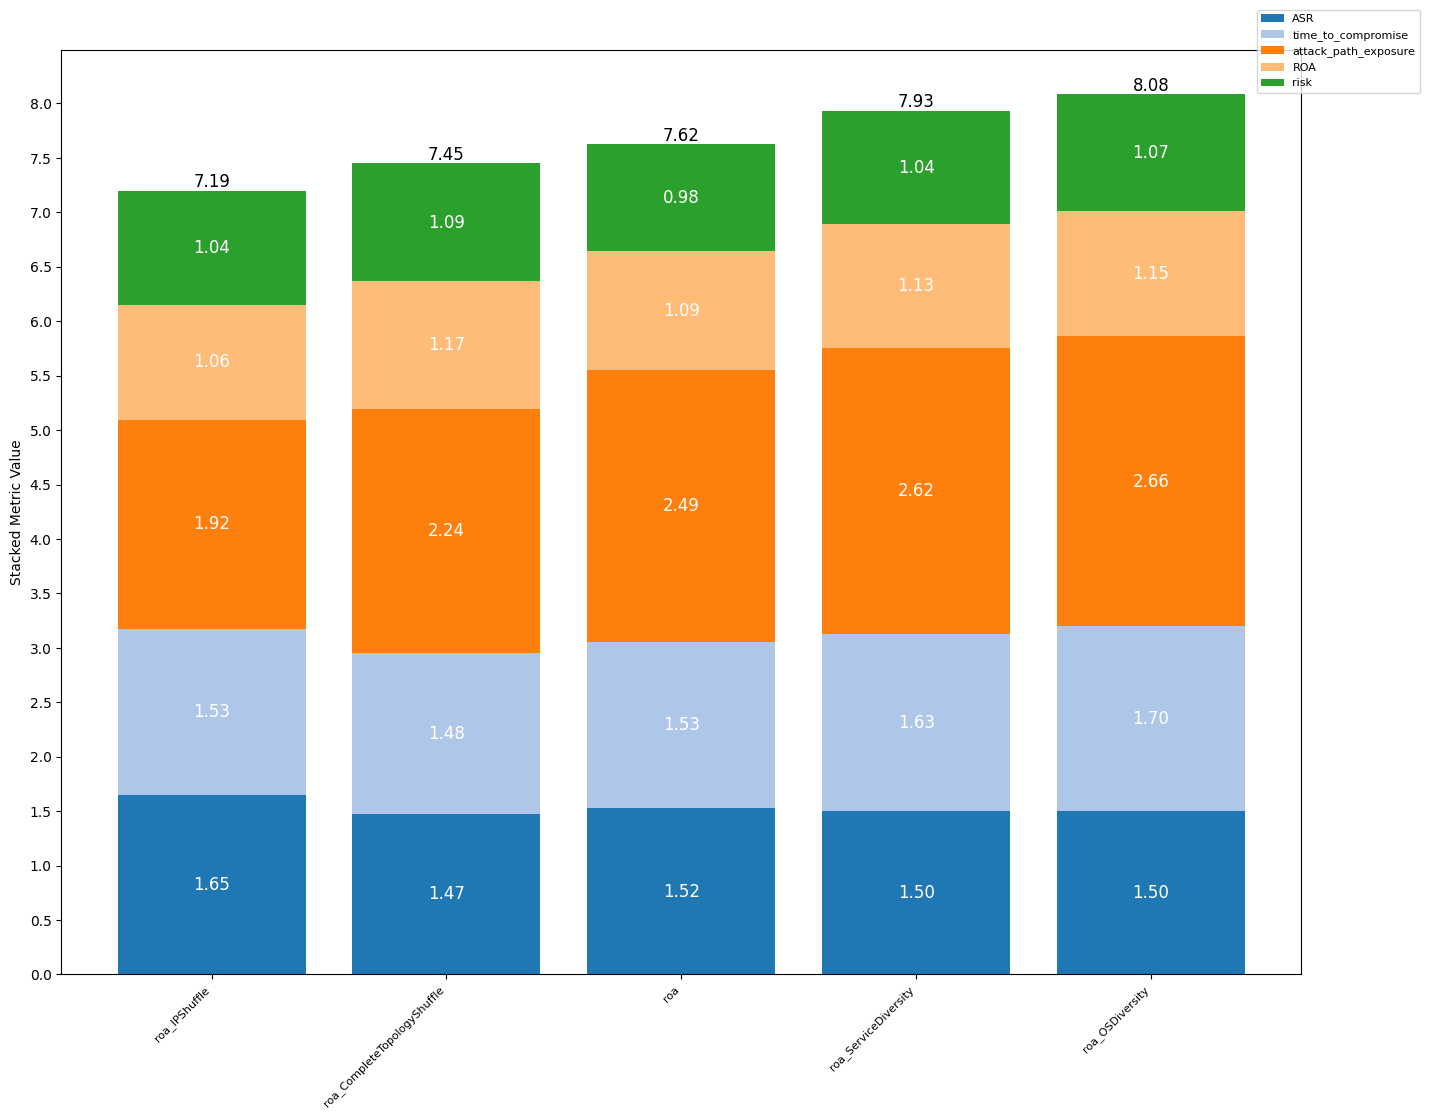

<Figure size 1600x1200 with 0 Axes>

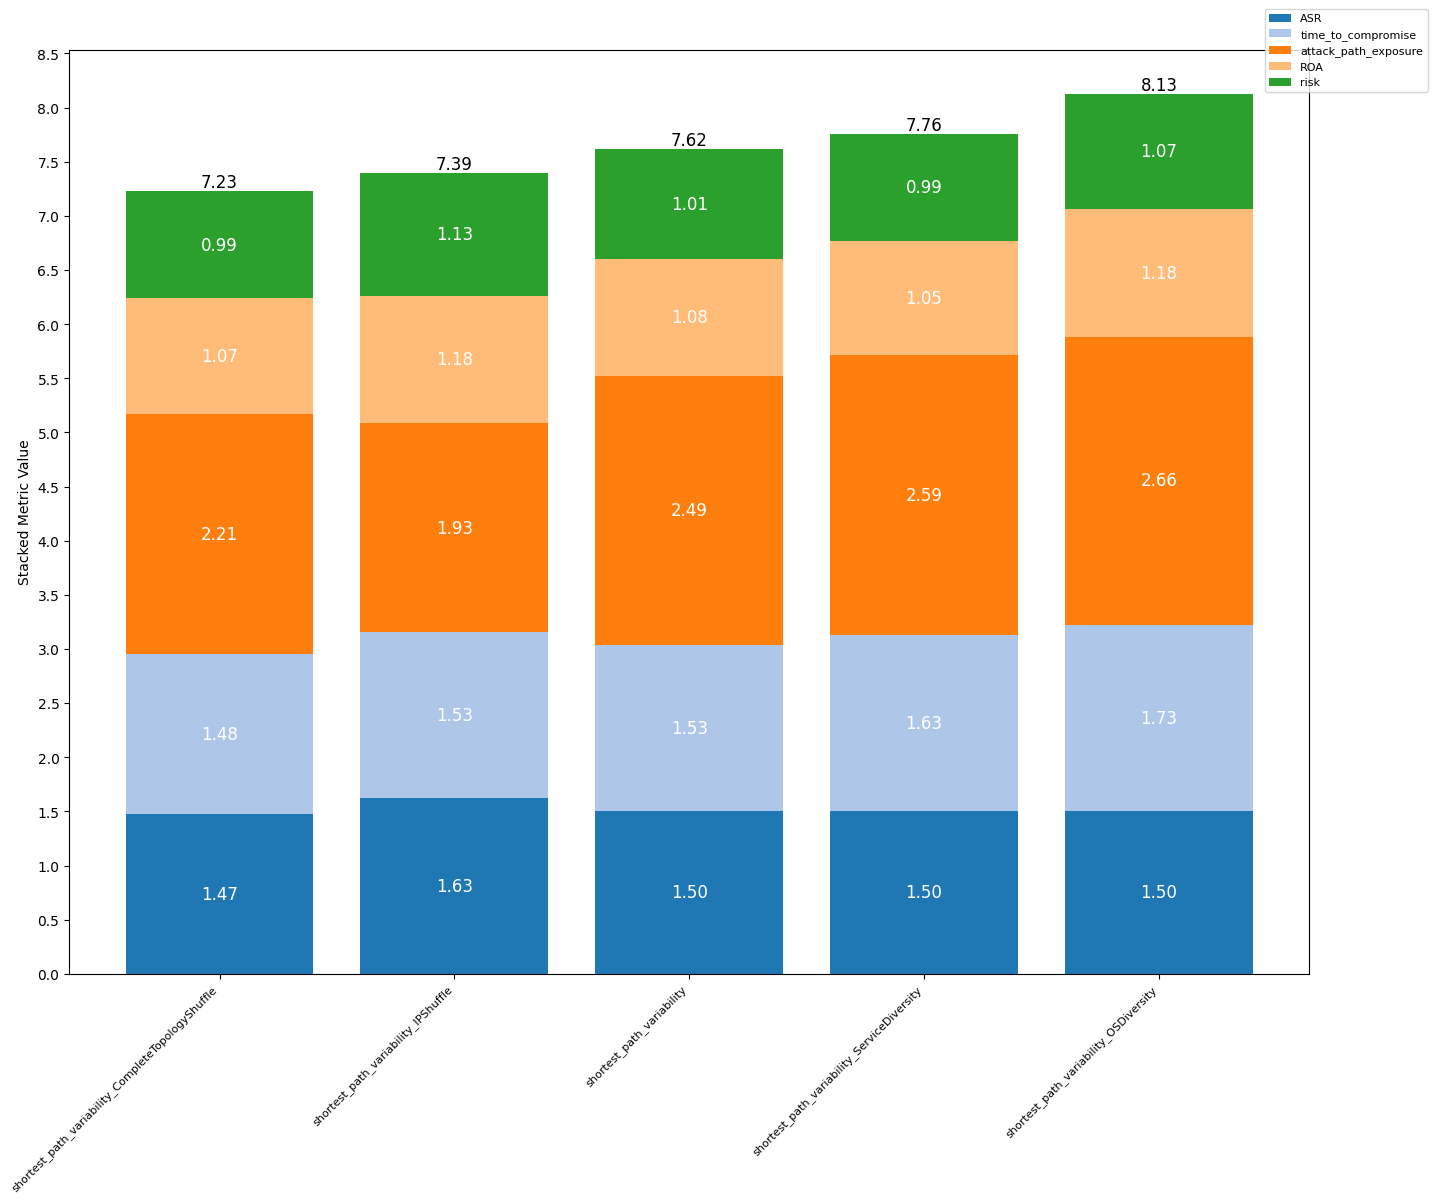

<Figure size 1600x1200 with 0 Axes>

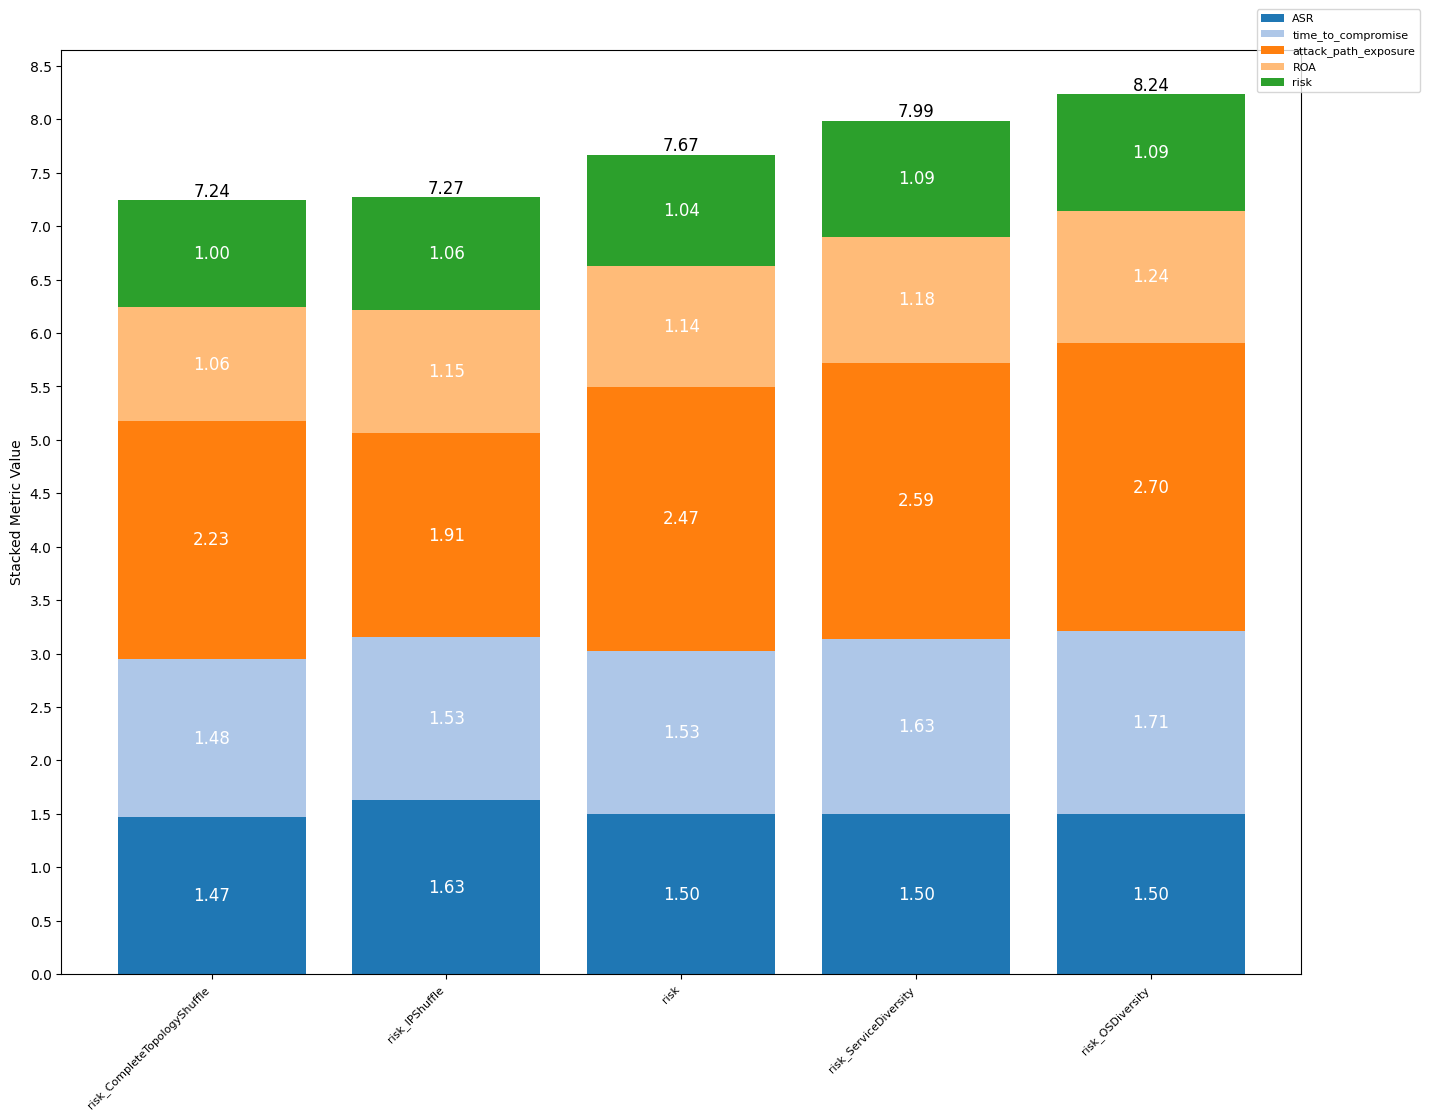

<Figure size 1600x1200 with 0 Axes>

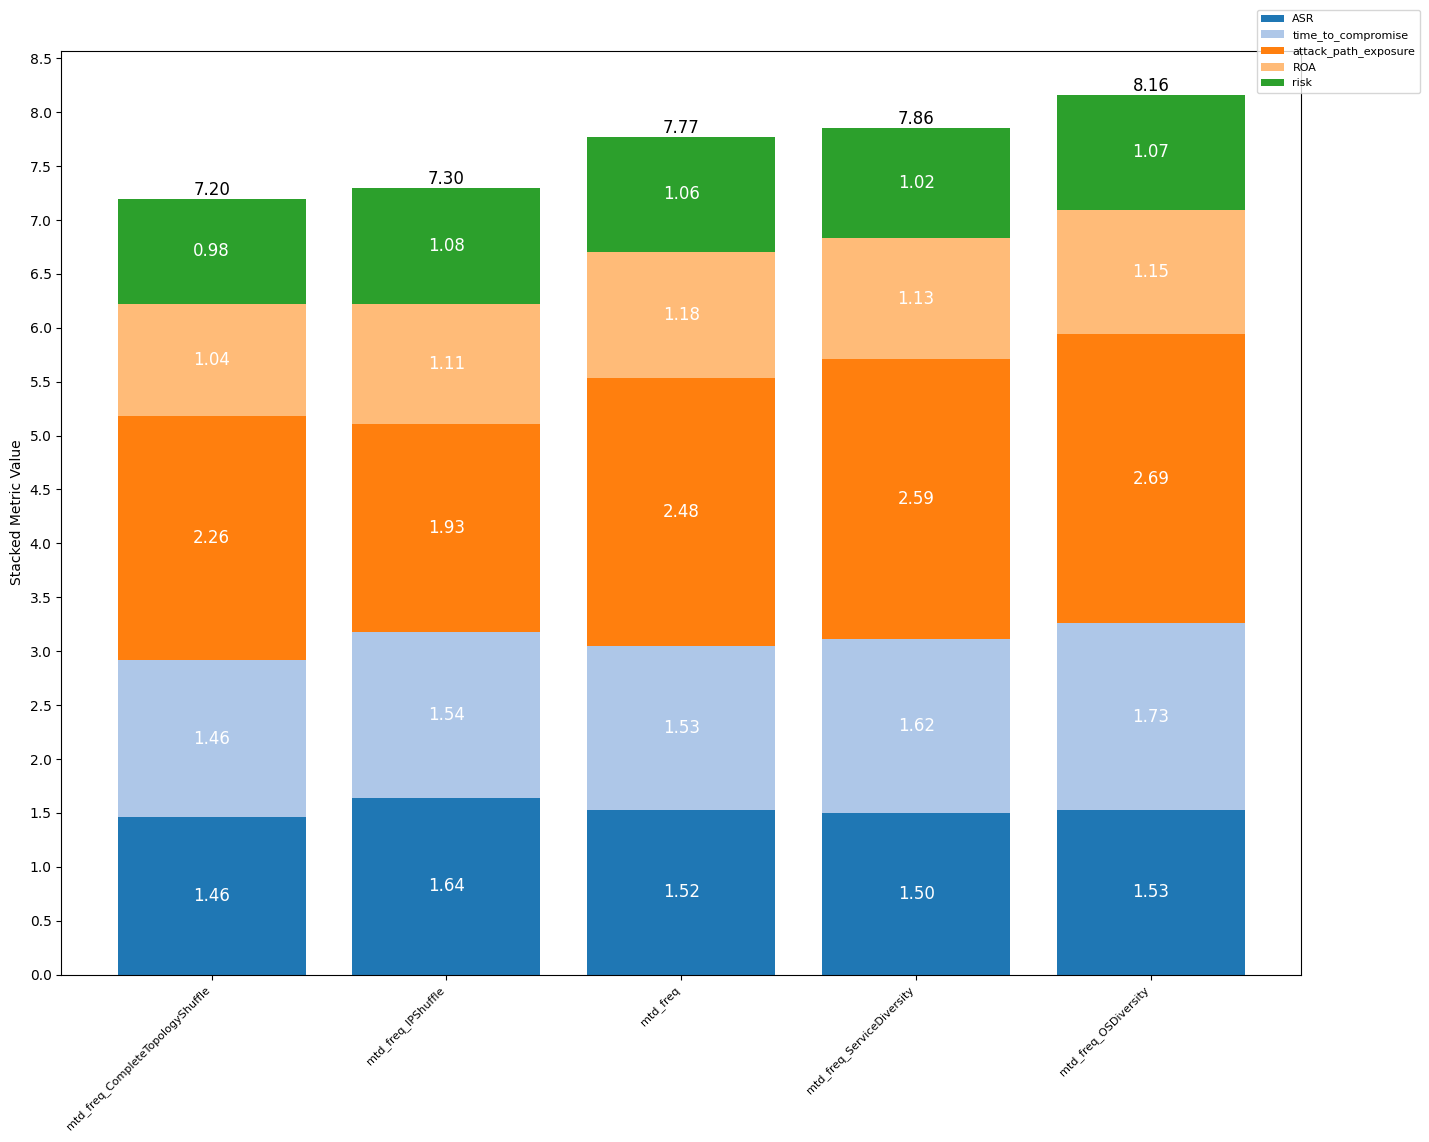

<Figure size 1600x1200 with 0 Axes>

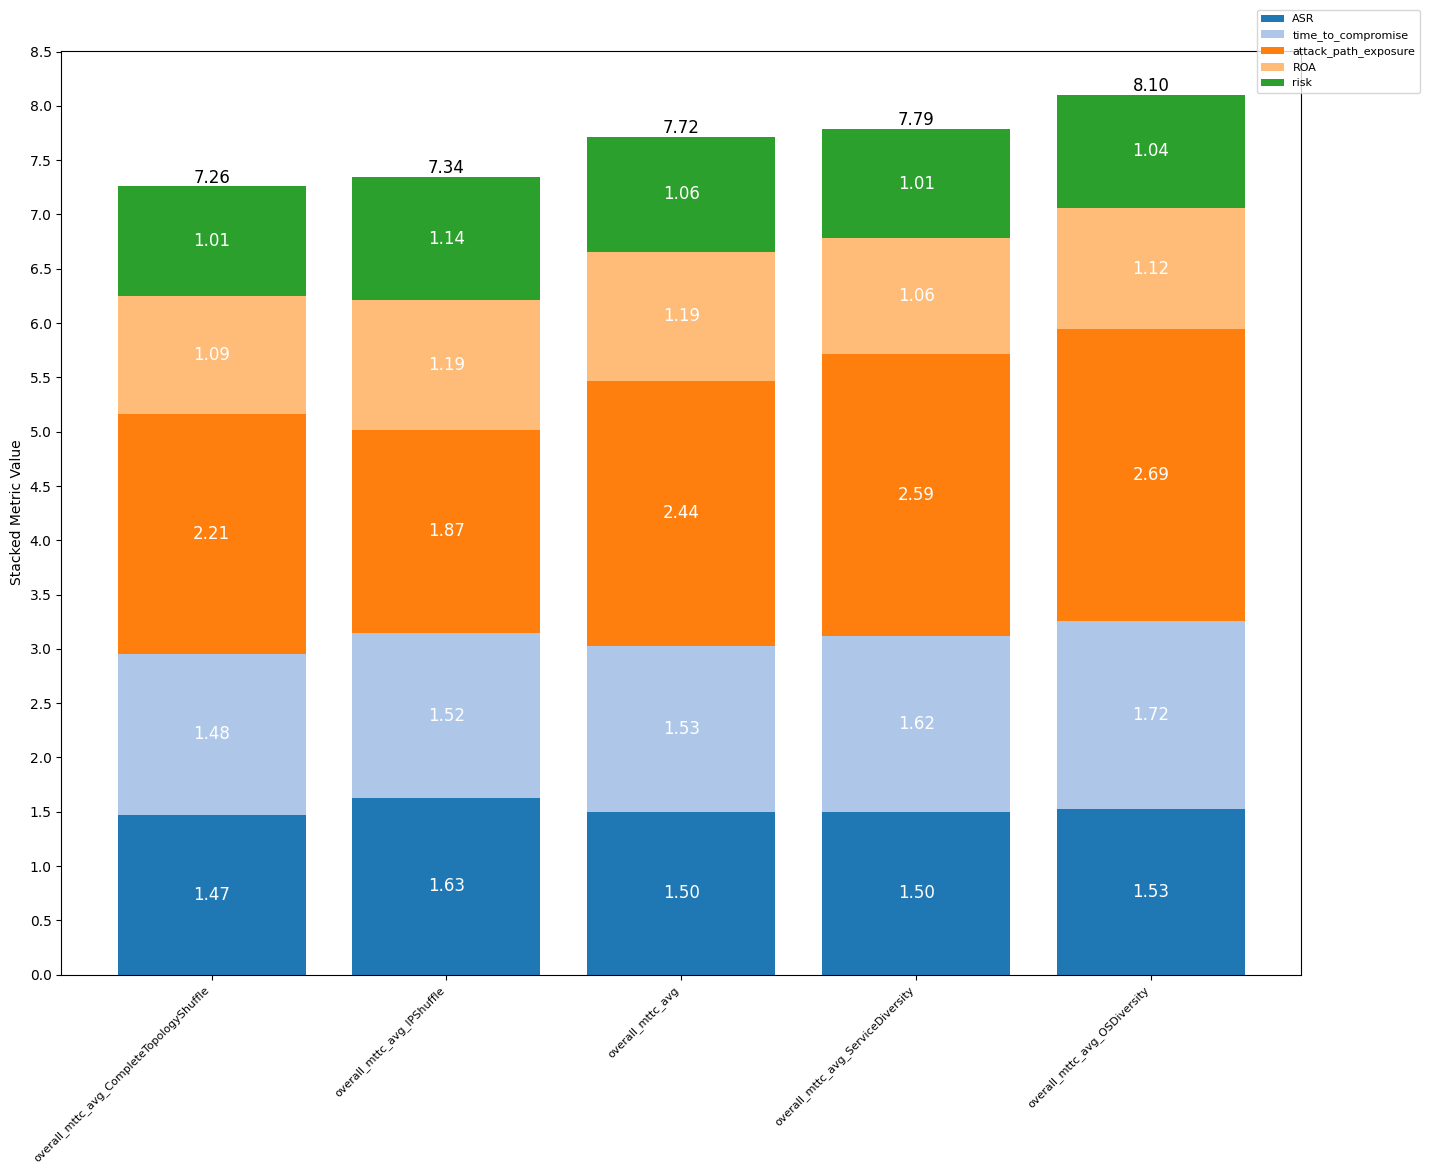

<Figure size 1600x1200 with 0 Axes>

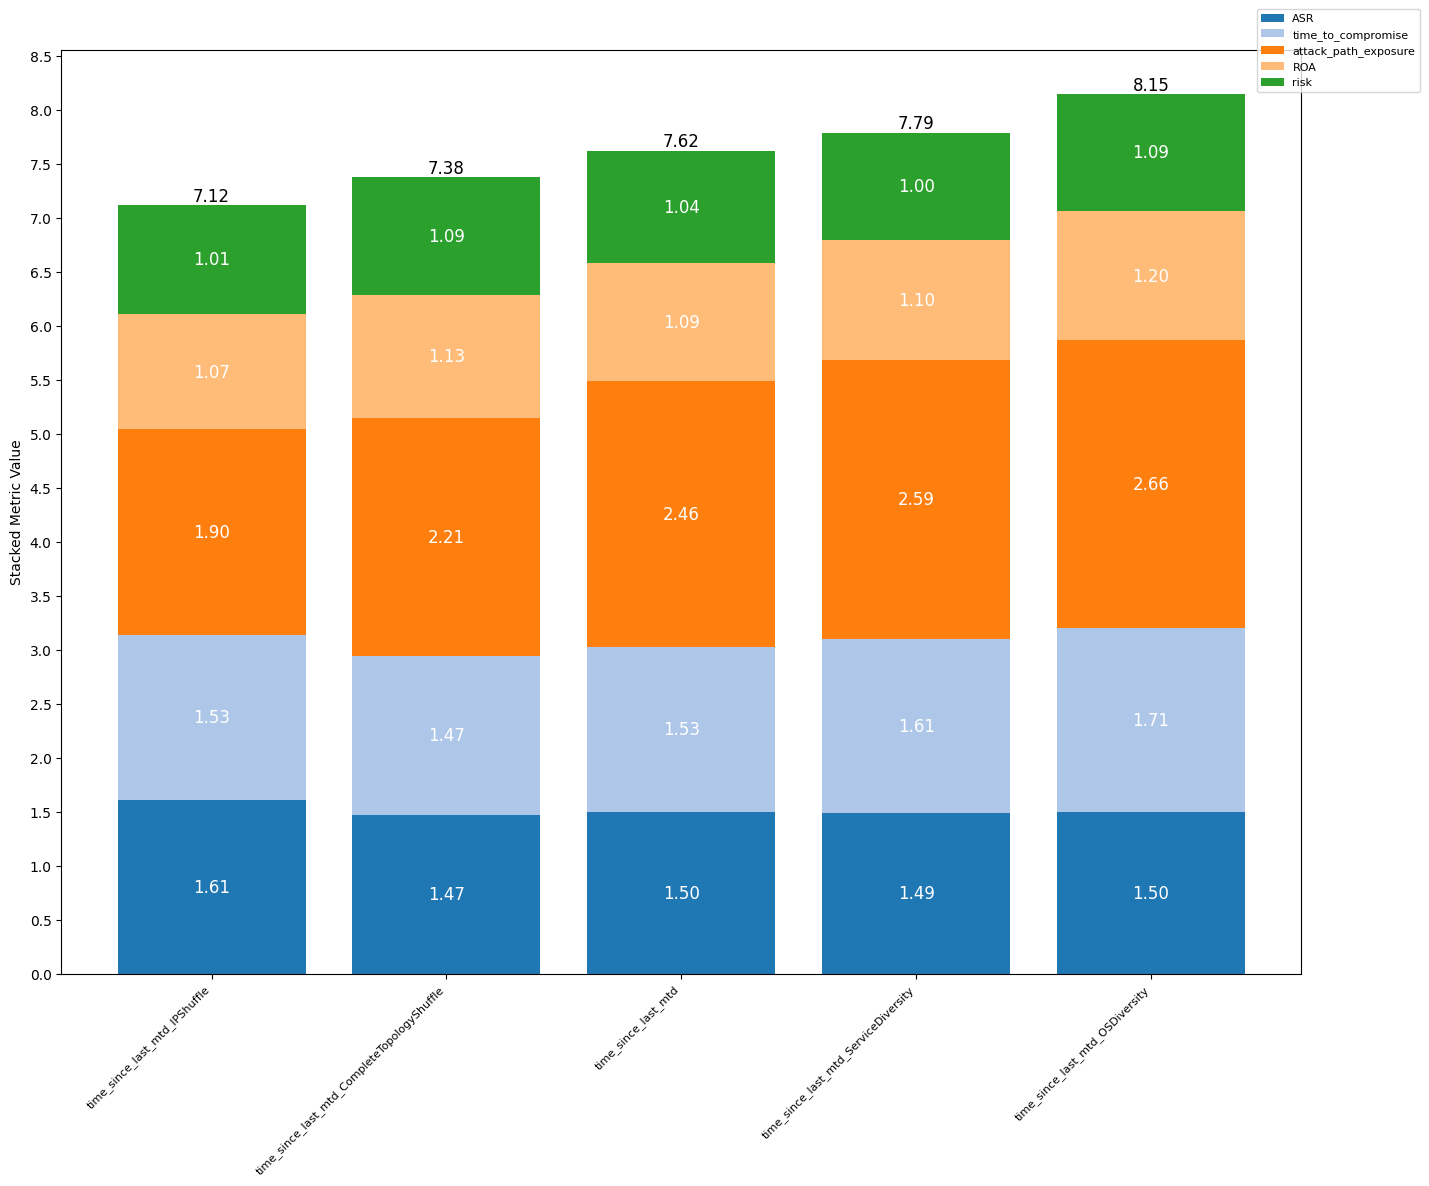

In [23]:

for metric in metrics:  
    data_copy = data
    metric_data = data_copy.filter(regex=metric)
    chart.process_weighted_metrics(metric_data)
    # Create a new figure for each metric
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Plot the schemes for the current metric
    chart.plot_n_schemes(name = metric, title=None)
    
    # Show the plot for the current metric
    plt.show()




In [16]:
mtd_schemes = ["CompleteTopologyShuffle",
        "IPShuffle",
        "OSDiversity",
        "ServiceDiversity"
    ]

<Figure size 1600x1200 with 0 Axes>

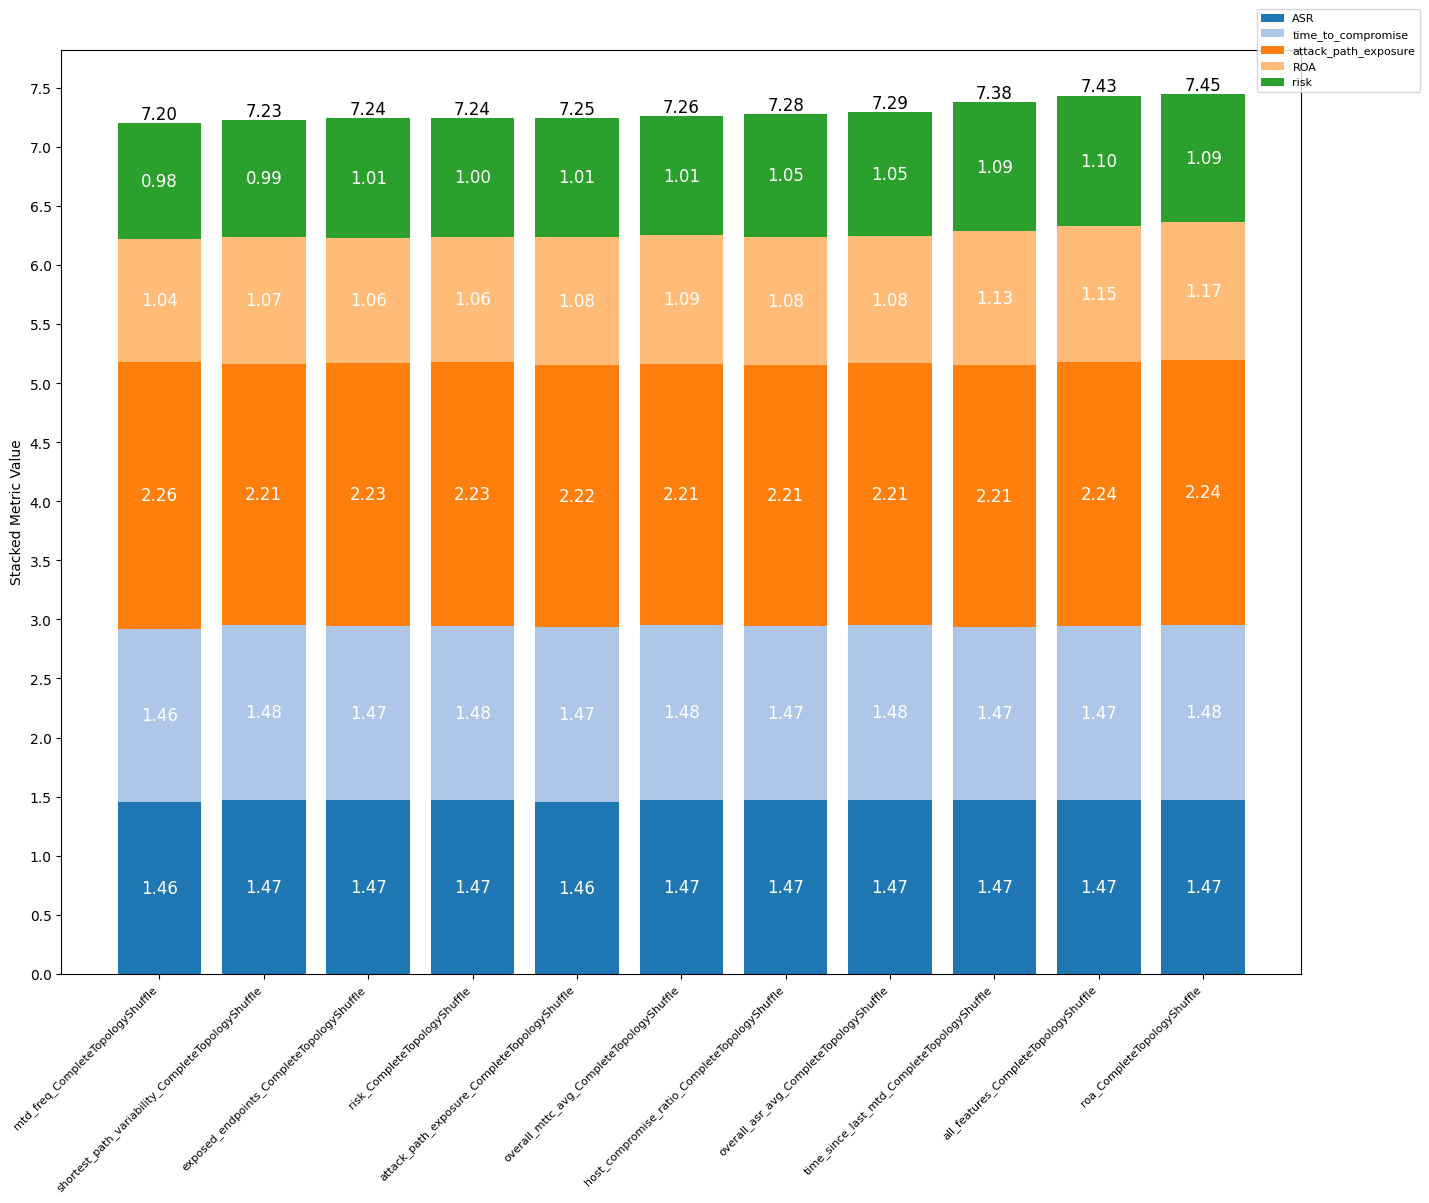

<Figure size 1600x1200 with 0 Axes>

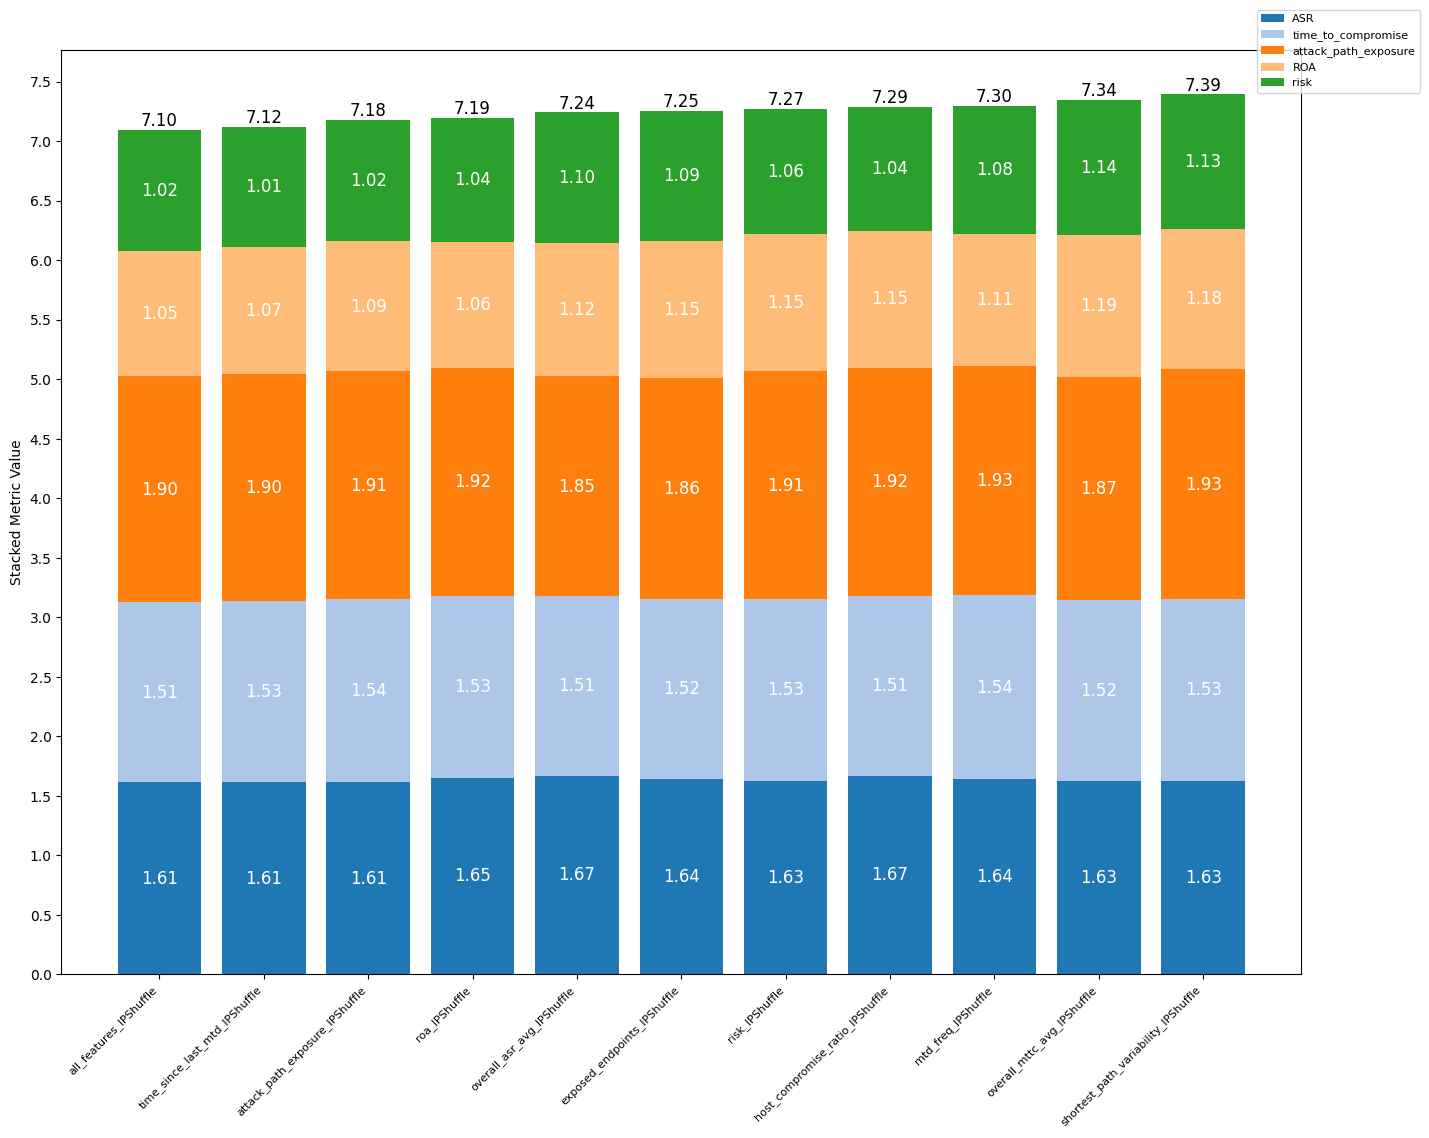

<Figure size 1600x1200 with 0 Axes>

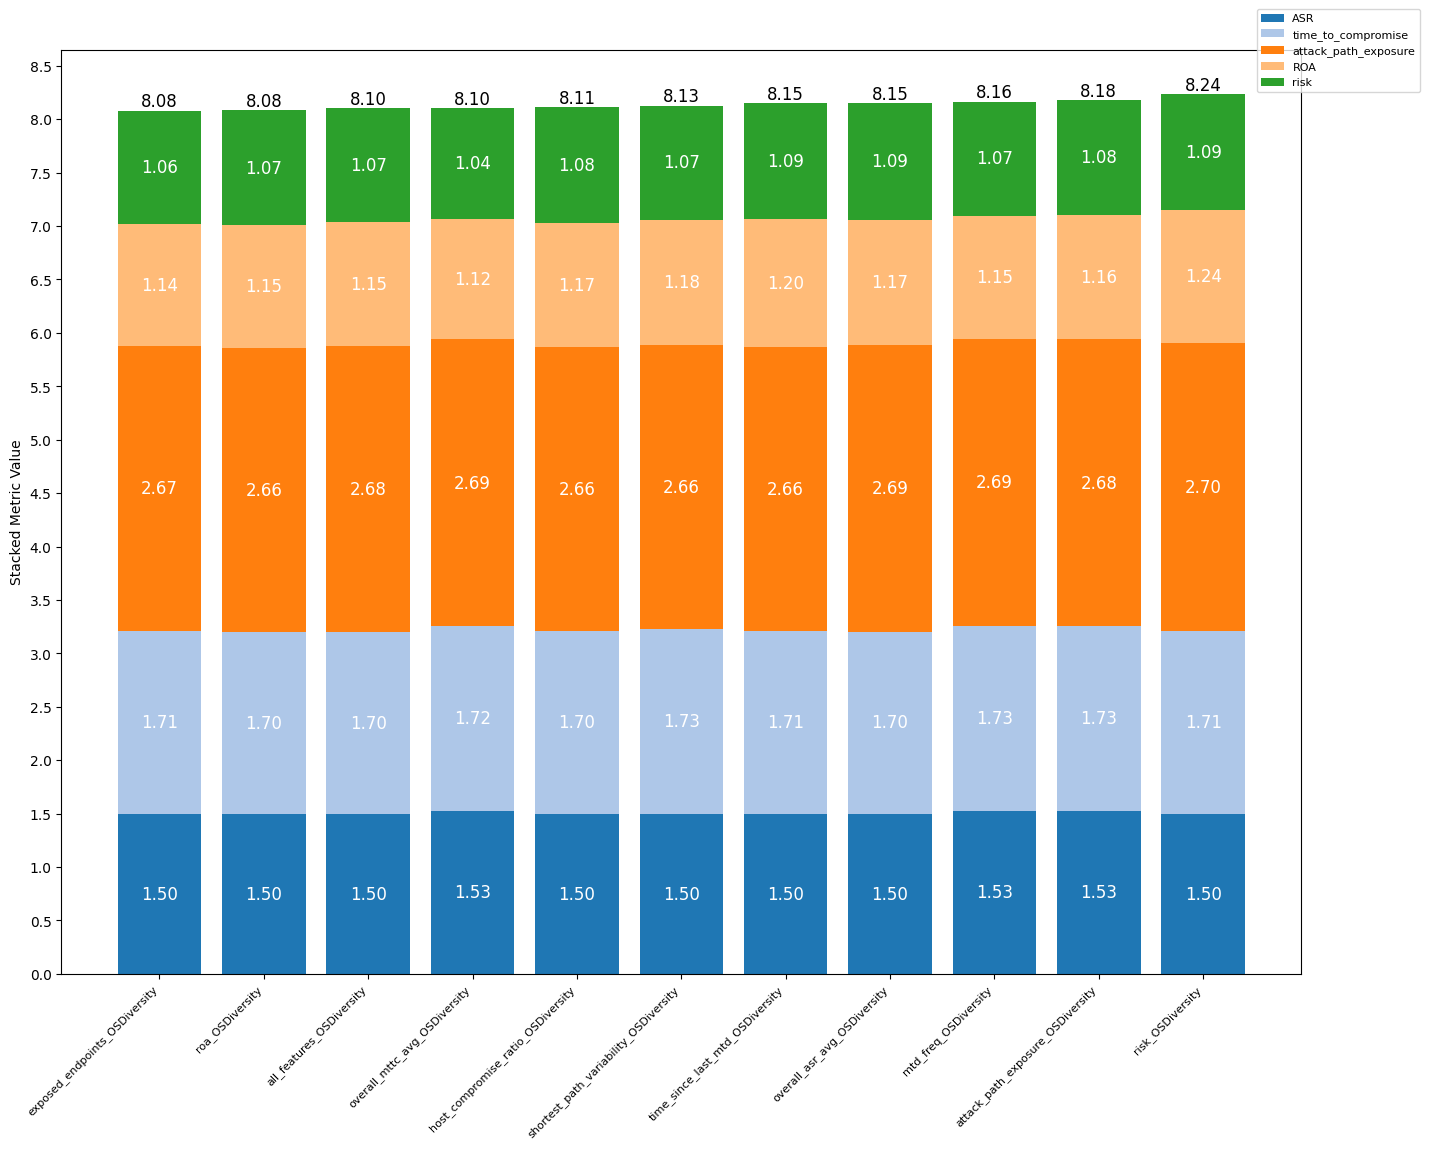

<Figure size 1600x1200 with 0 Axes>

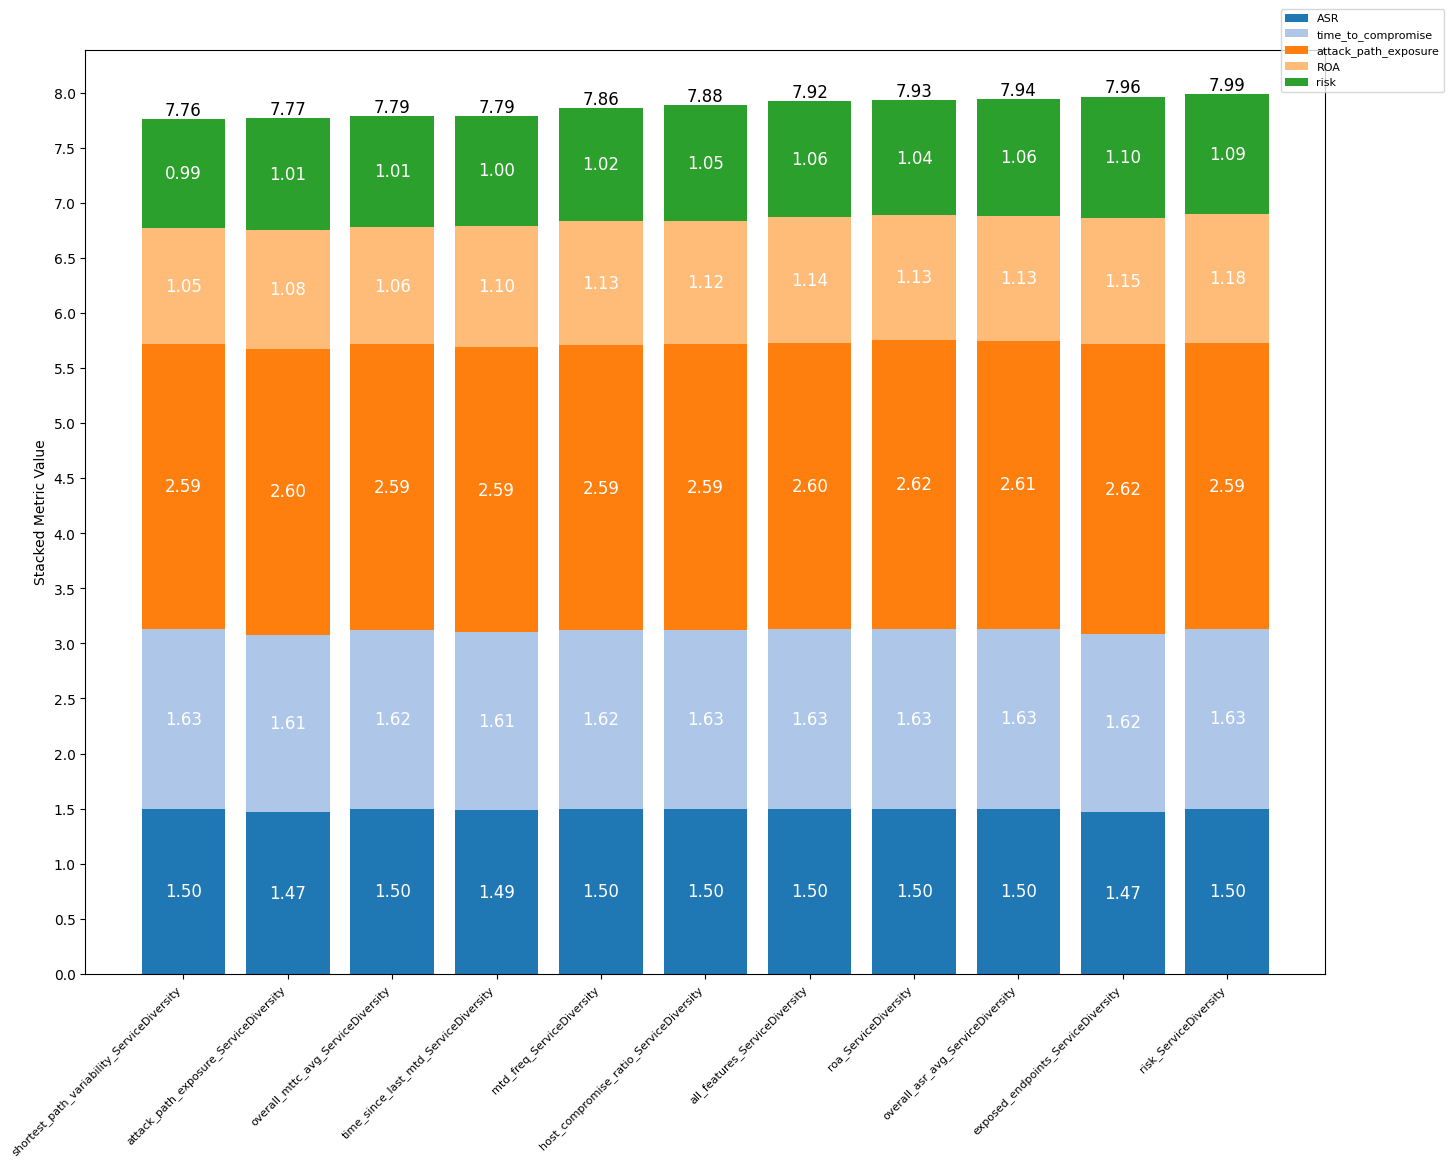

In [17]:

for mtd in mtd_schemes:  
    data_copy = data
    metric_data = data_copy.filter(regex=mtd)
    chart.process_weighted_metrics(metric_data)
    # Create a new figure for each metric
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Plot the schemes for the current metric
    chart.plot_n_schemes(name = mtd, title=None)
    
    # Show the plot for the current metric
    plt.show()



<Figure size 1600x1200 with 0 Axes>

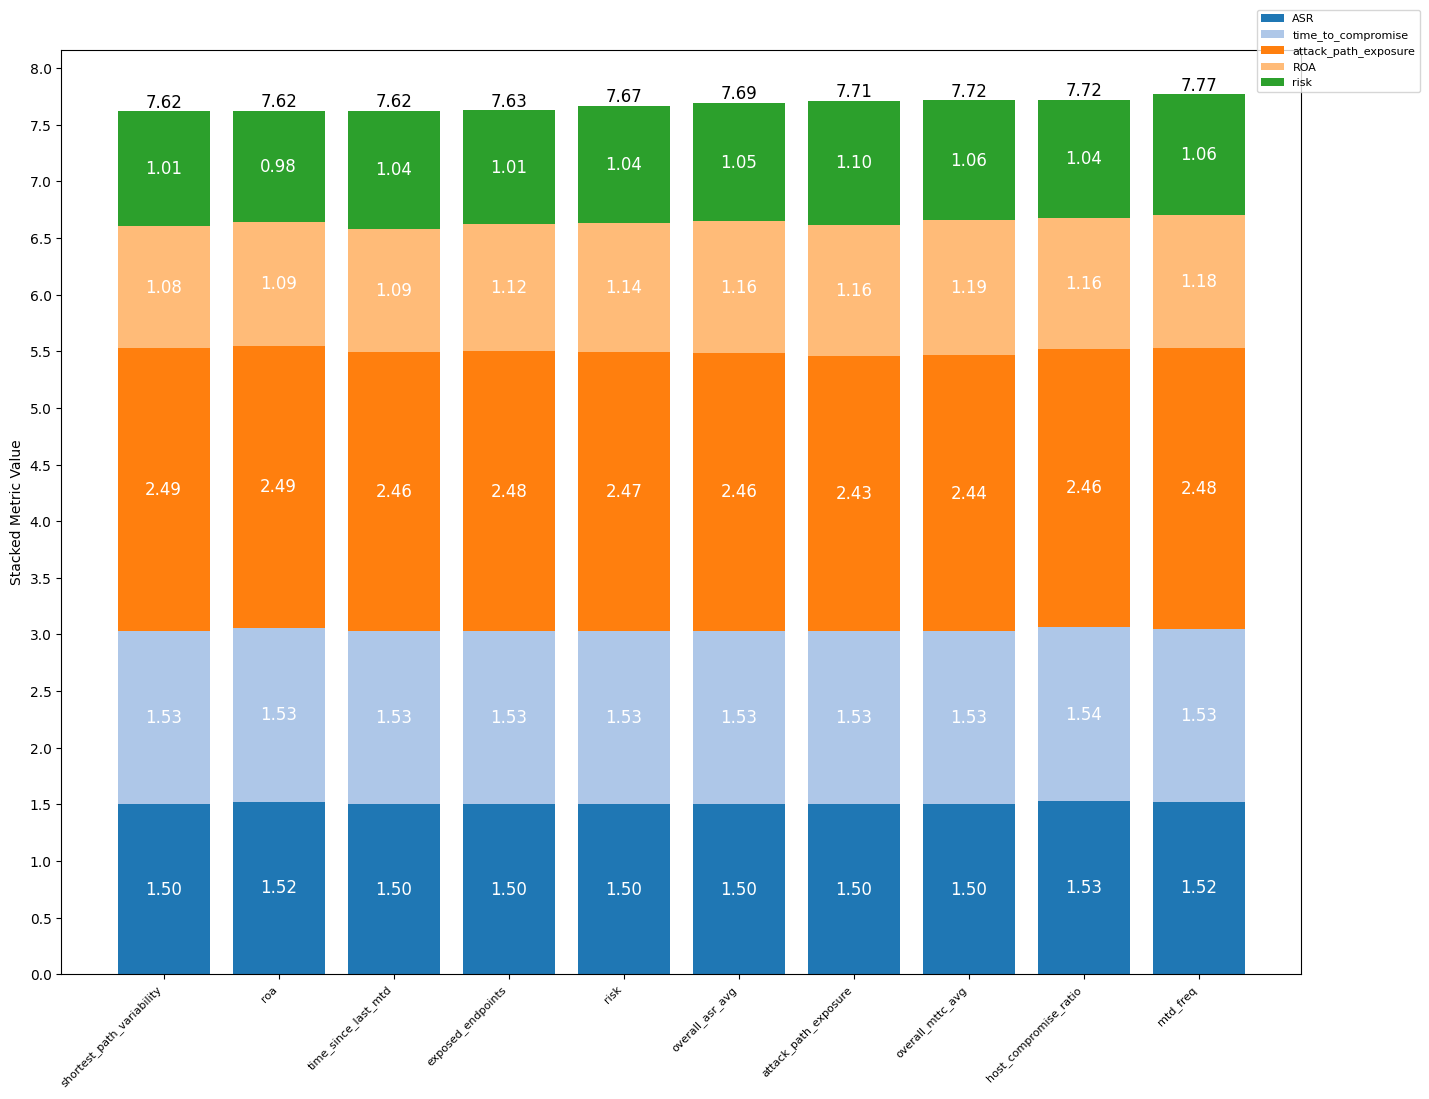

In [20]:
static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metric = static_features + time_features
data_copy = data
metric_data = data_copy[metric]
chart.process_weighted_metrics(metric_data)
# Create a new figure for each metric
plt.figure(figsize=(16, 12))  # Adjust the size as needed

# Plot the schemes for the current metric
chart.plot_n_schemes(name = "All_MTD", title=None)

# Show the plot for the current metric
plt.show()

In [24]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store median and standard deviation DataFrames
    medians = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that start with the current prefix
        related_columns = [col for col in df.columns if metric in col]
        if related_columns:
            # Calculate the median for each related column
            median_df = df[related_columns].median(axis=1)
            medians[metric] = median_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    medians_df = pd.DataFrame(medians)
    std_devs_df = pd.DataFrame(std_devs)

    return medians_df, std_devs_df

# Group by feature prefix and calculate the median and standard deviation
medians_df, std_devs_df = group_by_feature(data)


In [37]:
data_copy = medians_df.T.sort_values(by='sum').T

In [70]:
data_copy

,shortest_path_variability,roa,time_since_last_mtd,exposed_endpoints,risk,all_features,overall_asr_avg,attack_path_exposure,overall_mttc_avg,host_compromise_ratio,mtd_freq
ASR,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.524298
time_to_compromise,1.533368,1.530499,1.530234,1.526280,1.526909,1.545631,1.529911,1.538282,1.526821,1.535351,1.543244
attack_path_exposure,2.491621,2.494779,2.460476,2.478623,2.467158,2.451284,2.456382,2.428102,2.440142,2.460476,2.481152
ROA,1.078448,1.133929,1.103751,1.141477,1.148476,1.138042,1.132470,1.092327,1.121795,1.150830,1.128444
risk,1.014949,1.040997,1.043271,1.061148,1.055540,1.056053,1.060955,1.024170,1.040615,1.046188,1.062859
sum,7.618386,7.622968,7.623241,7.627492,7.669121,7.693023,7.693699,7.713696,7.716802,7.721734,7.770475
zscore,-0.076545,-0.063456,-0.062676,-0.050535,0.068385,0.136662,0.138594,0.195717,0.204591,0.218680,0.357913
minmax,0.458091,0.462104,0.462343,0.466065,0.502526,0.523460,0.524052,0.541566,0.544286,0.548606,0.591295


In [65]:
import seaborn as sns

In [69]:
metric_data.sort_values()

shortest_path_variability    7.618386
roa                          7.622968
time_since_last_mtd          7.623241
exposed_endpoints            7.627492
risk                         7.669121
overall_asr_avg              7.693699
attack_path_exposure         7.713696
overall_mttc_avg             7.716802
host_compromise_ratio        7.721734
mtd_freq                     7.770475
Name: sum, dtype: float64

In [57]:
std_devs_df.T

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
all_features,0.053432,0.090697,0.313811,0.042284,0.032110,0.398864,1.139398,0.349337
host_compromise_ratio,0.077080,0.093372,0.304881,0.035674,0.017057,0.367710,1.050404,0.322052
exposed_endpoints,0.069722,0.093856,0.335155,0.039083,0.044288,0.389154,1.111660,0.340833
attack_path_exposure,0.060540,0.097437,0.309325,0.041478,0.041519,0.411221,1.174698,0.360160
overall_asr_avg,0.078567,0.092533,0.342173,0.035651,0.024377,0.398380,1.138017,0.348914
roa,0.069943,0.087402,0.311376,0.045451,0.040571,0.358385,1.023766,0.313885
shortest_path_variability,0.060221,0.097449,0.302451,0.061883,0.059809,0.346443,0.989652,0.303426
risk,0.060221,0.095502,0.312361,0.064150,0.036828,0.436712,1.247516,0.382486
mtd_freq,0.066952,0.102035,0.302352,0.050850,0.041878,0.403318,1.152123,0.353239
overall_mttc_avg,0.059252,0.098540,0.327177,0.058417,0.052261,0.345364,0.986570,0.302481


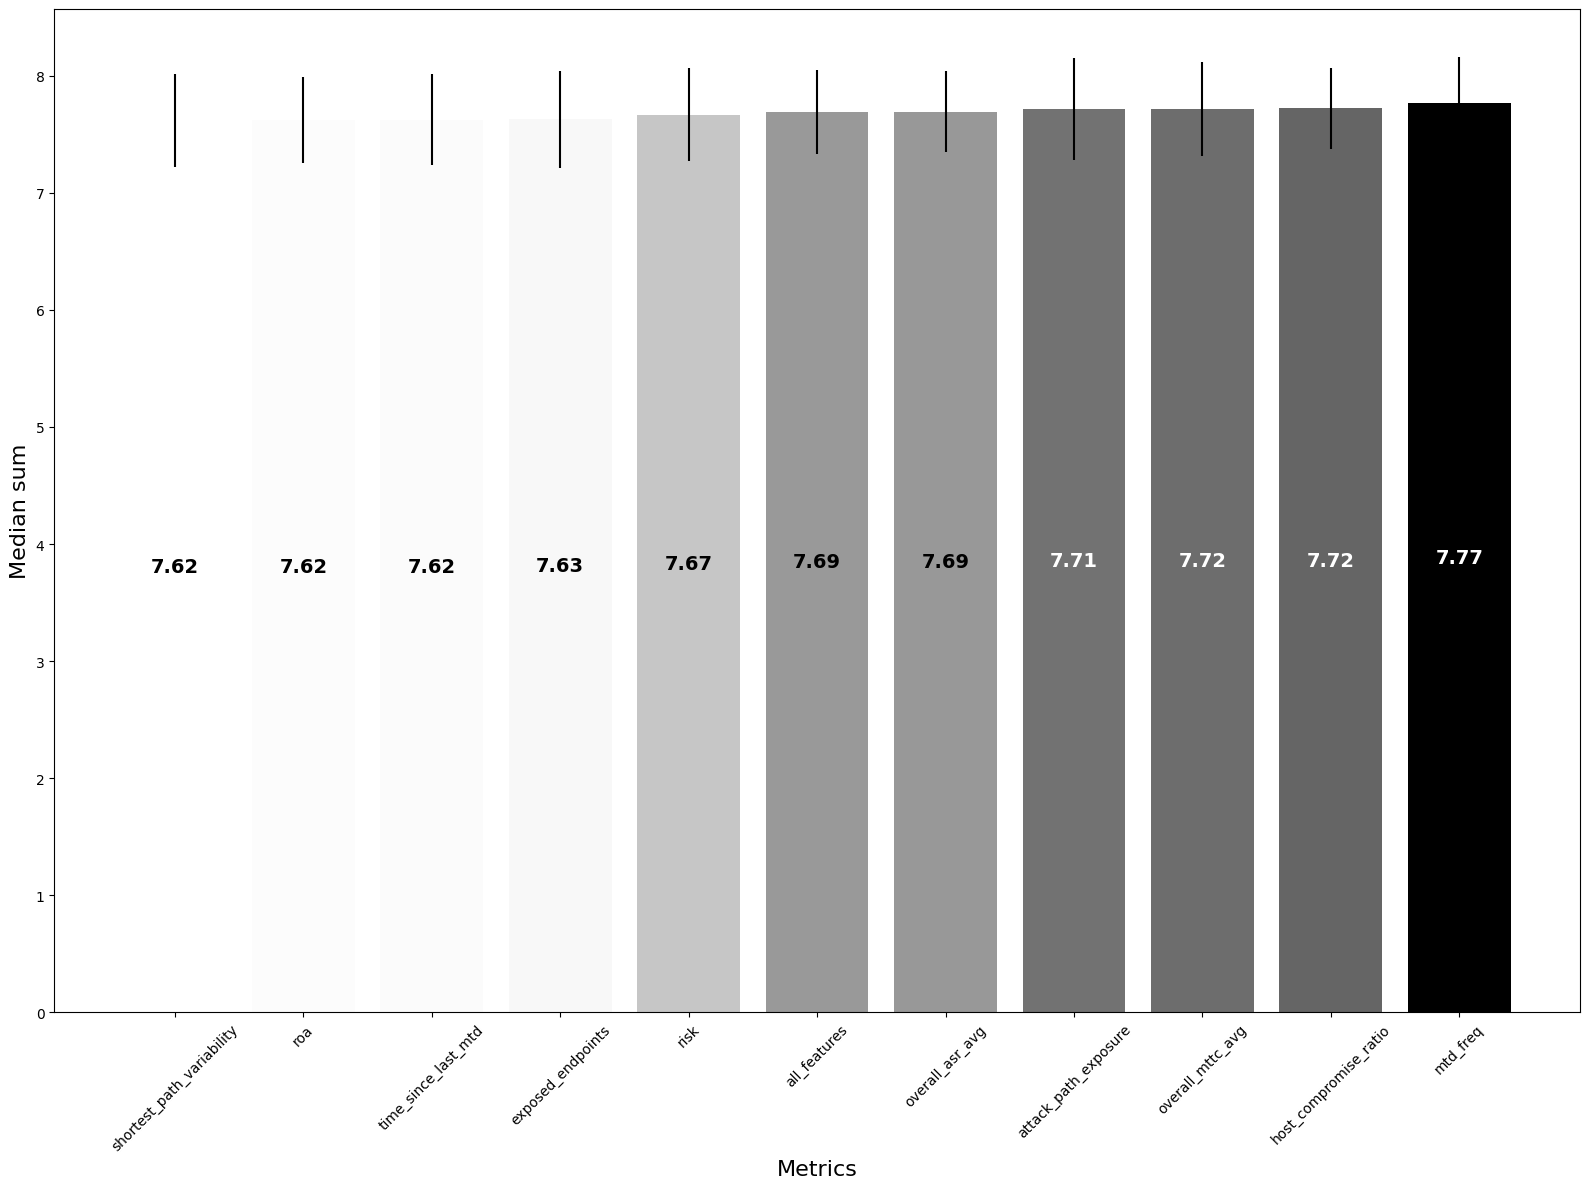

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_copy' is a DataFrame containing metric data, and 'std_devs_df' contains standard deviations.

# Extract metric data and sort by 'sum'
metric_data = data_copy.T['sum'].sort_values()

# Normalize the data for grayscale shading
norm = plt.Normalize(vmin=metric_data.min(), vmax=metric_data.max())
cmap = plt.get_cmap("Greys")  # Use the Greys colormap for black shades

# Create a new figure
plt.figure(figsize=(16, 12))  # Adjust the size as needed

# Generate colors based on the grayscale colormap
bar_colors = cmap(norm(metric_data.values))

# Create a seaborn barplot with grayscale shades
ax = sns.barplot(x=metric_data.index, y=metric_data.values, palette=bar_colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add numerical values in the center of the bars
for i, value in enumerate(metric_data.values):
    # Set text color: dark bars get white text, light bars get black text
    text_color = 'white' if norm(value) > 0.5 else 'black'
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=14, weight='bold')

# Add error bars using standard deviations
yerr = std_devs_df.T['sum'][:len(metric_data)]  # Ensure the yerr length matches metric_data
ax.errorbar(metric_data.index, metric_data.values, yerr=yerr, fmt='none', color='black')

# Set title and labels
plt.xlabel('Metrics', fontsize=16)
plt.ylabel(f'Sum (Median)', fontsize=16)

# Show the plot for the current metric
plt.tight_layout()
plt.savefig("Overview.png")
plt.show()


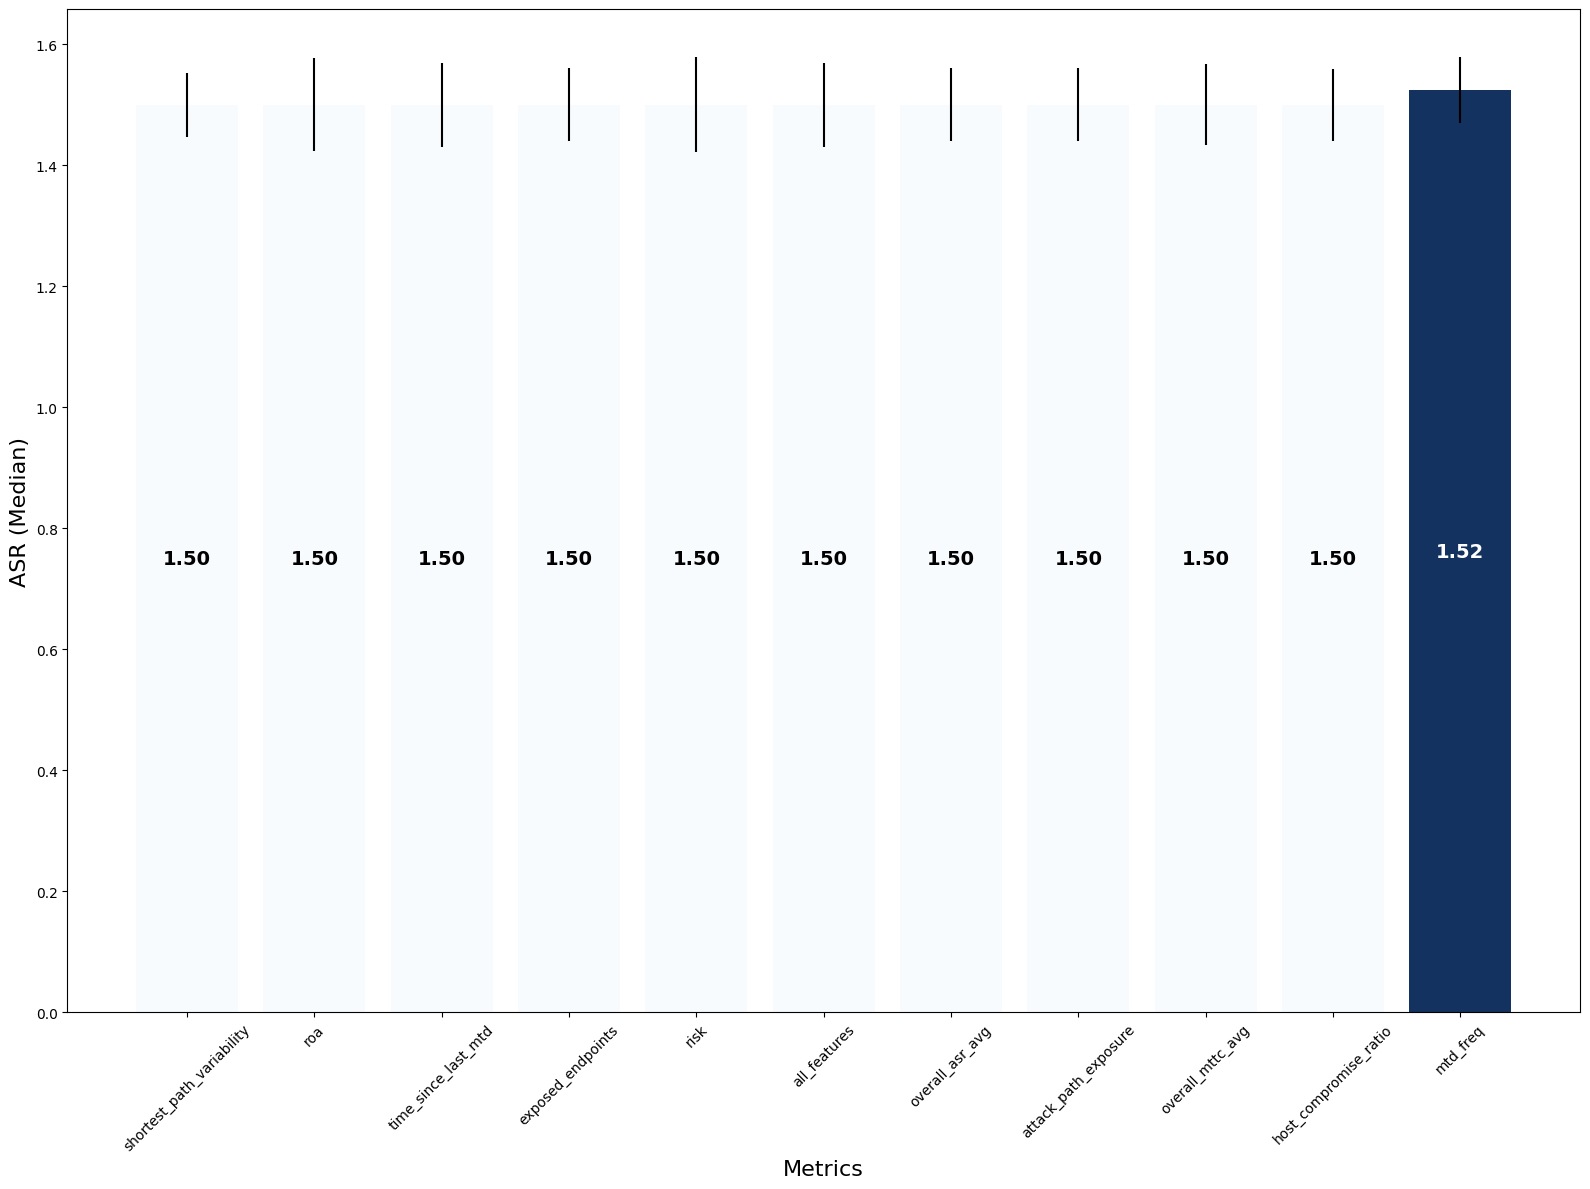

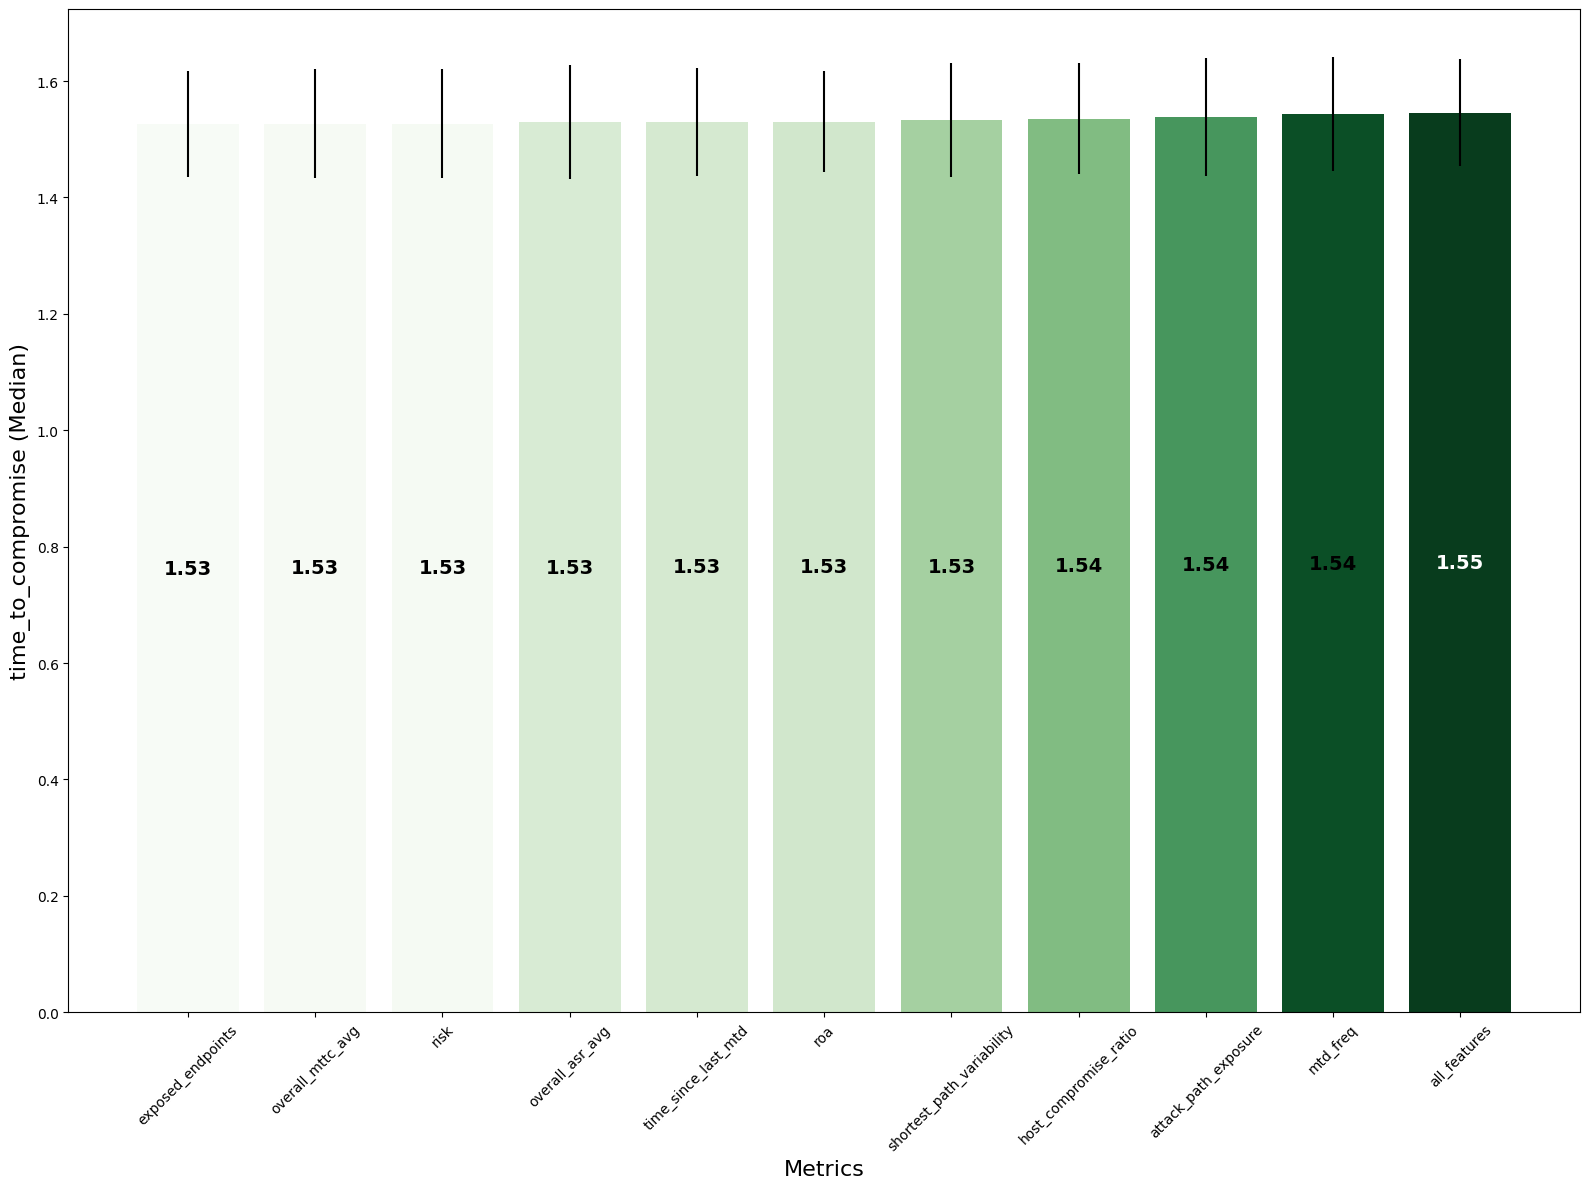

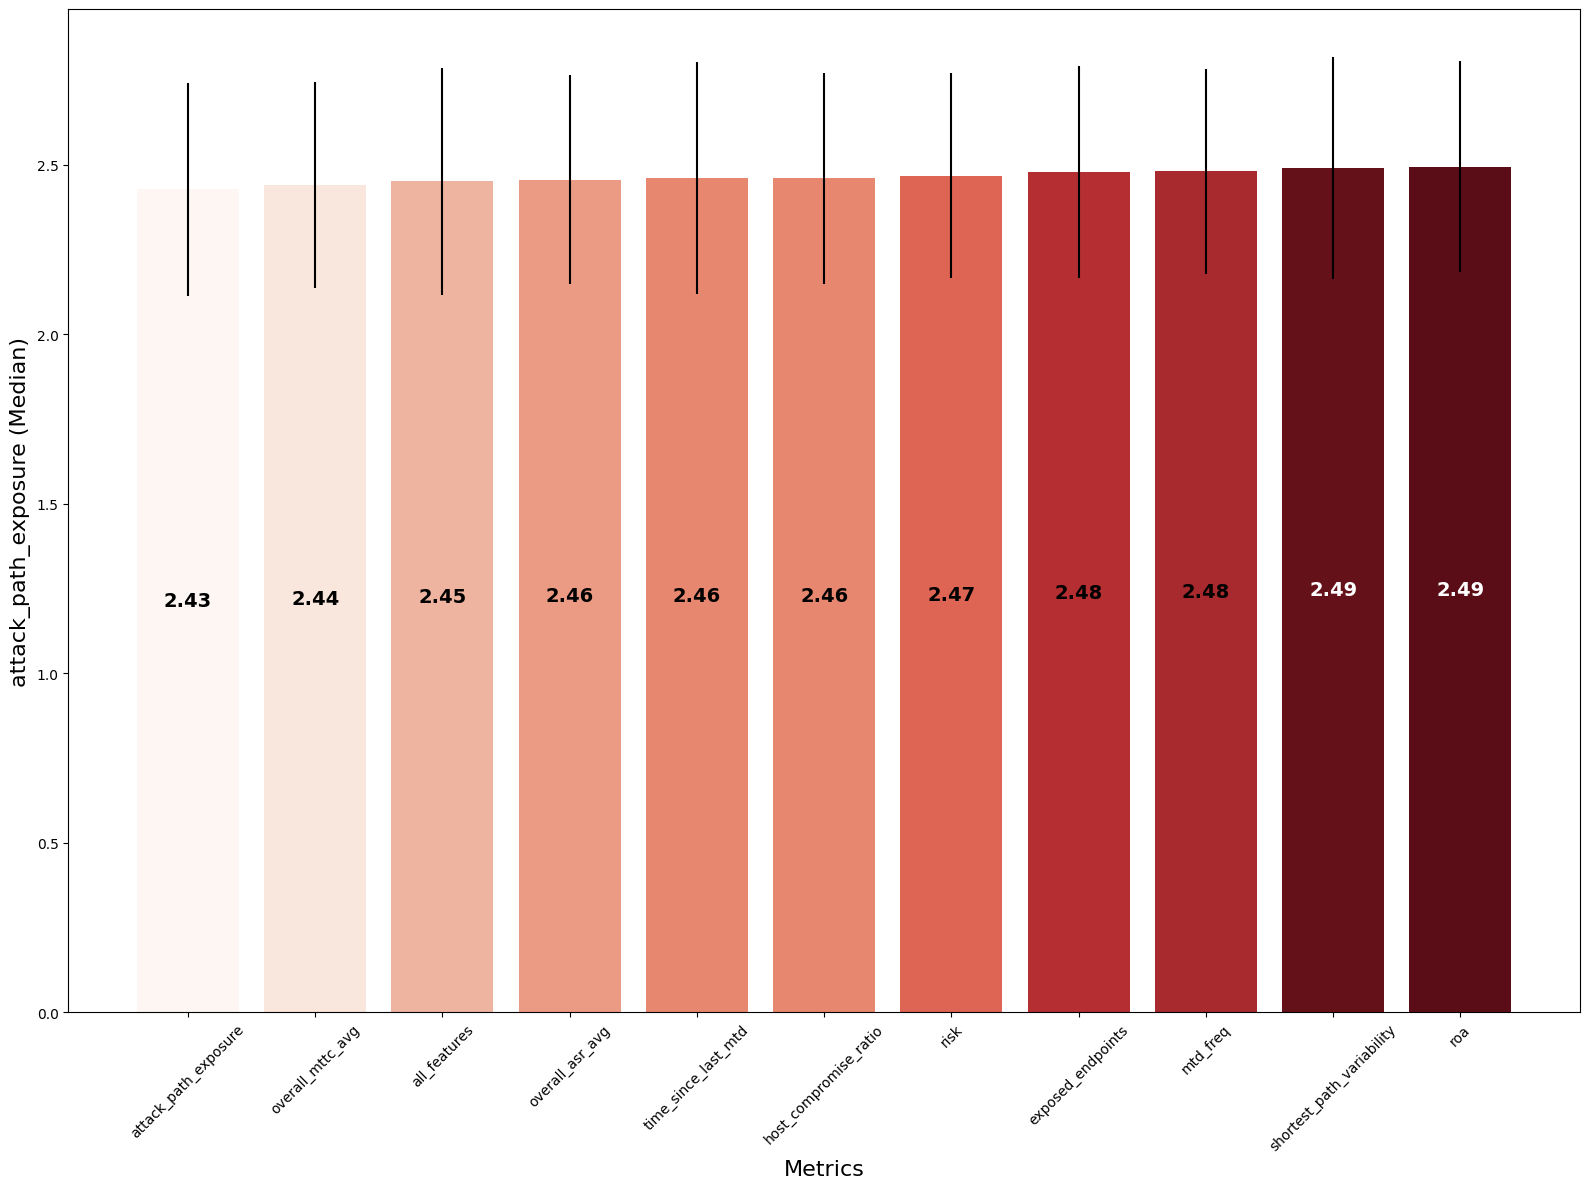

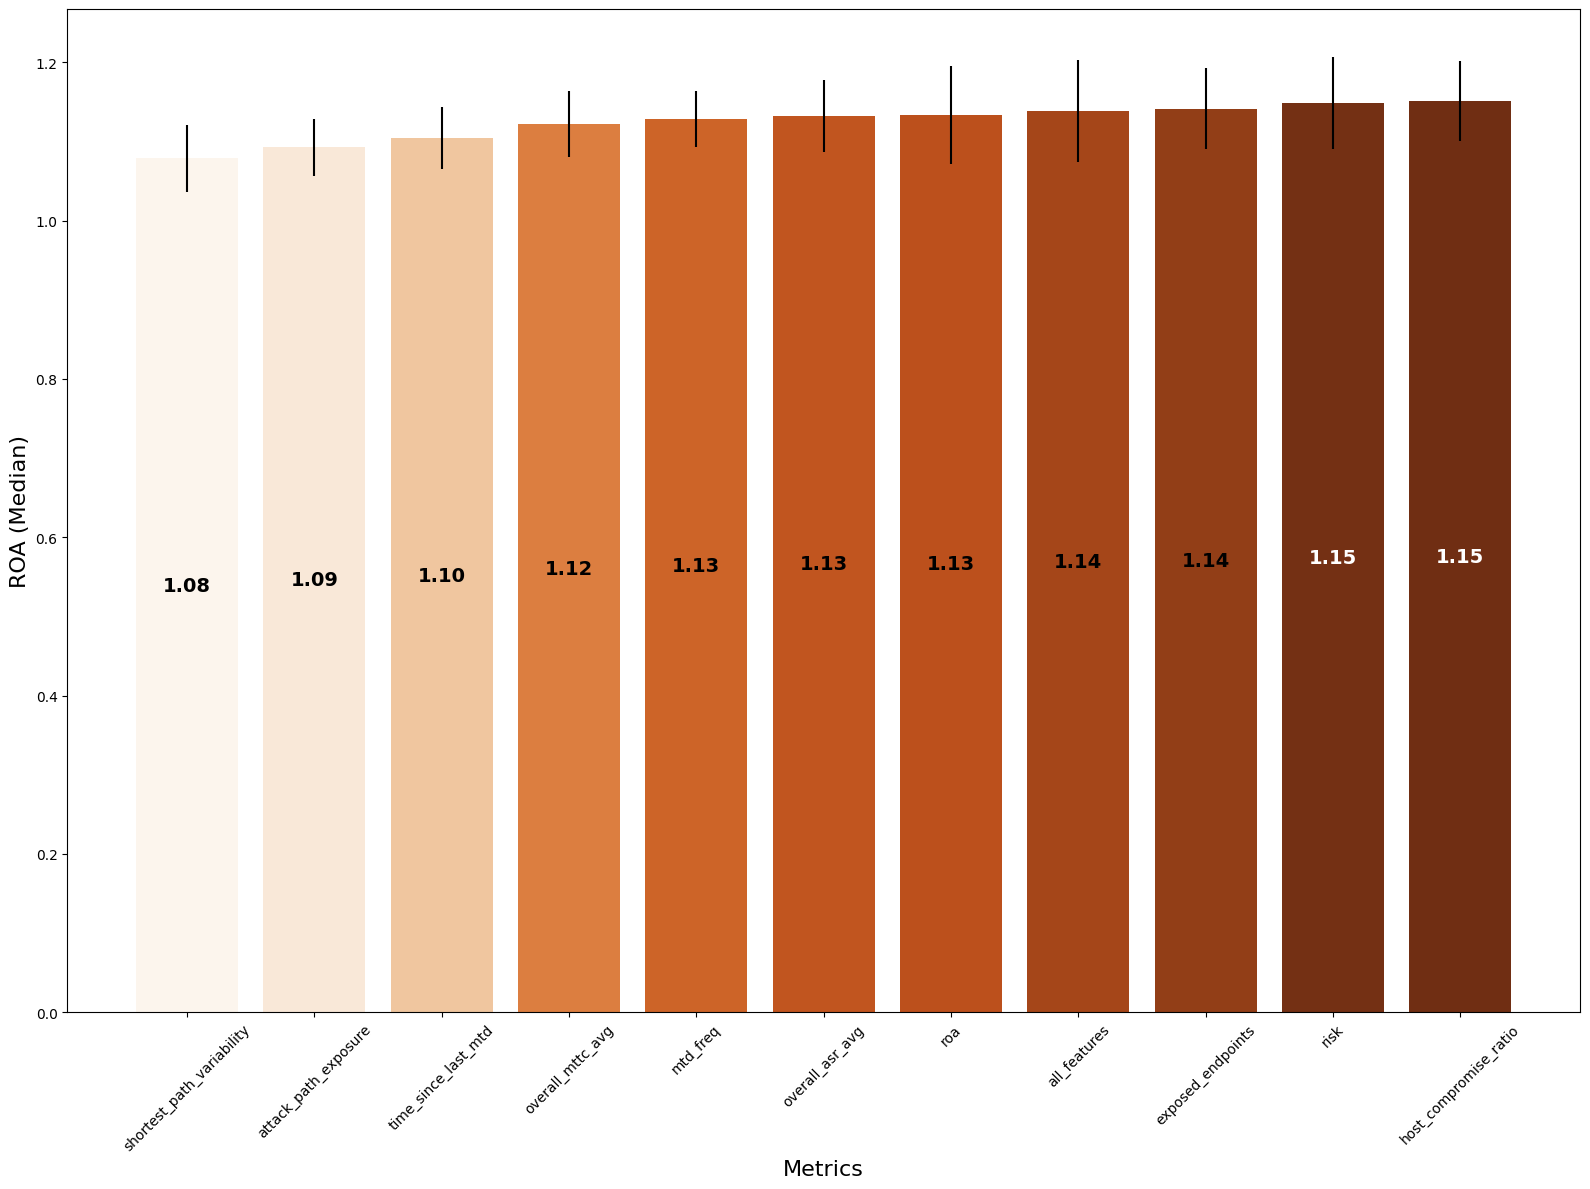

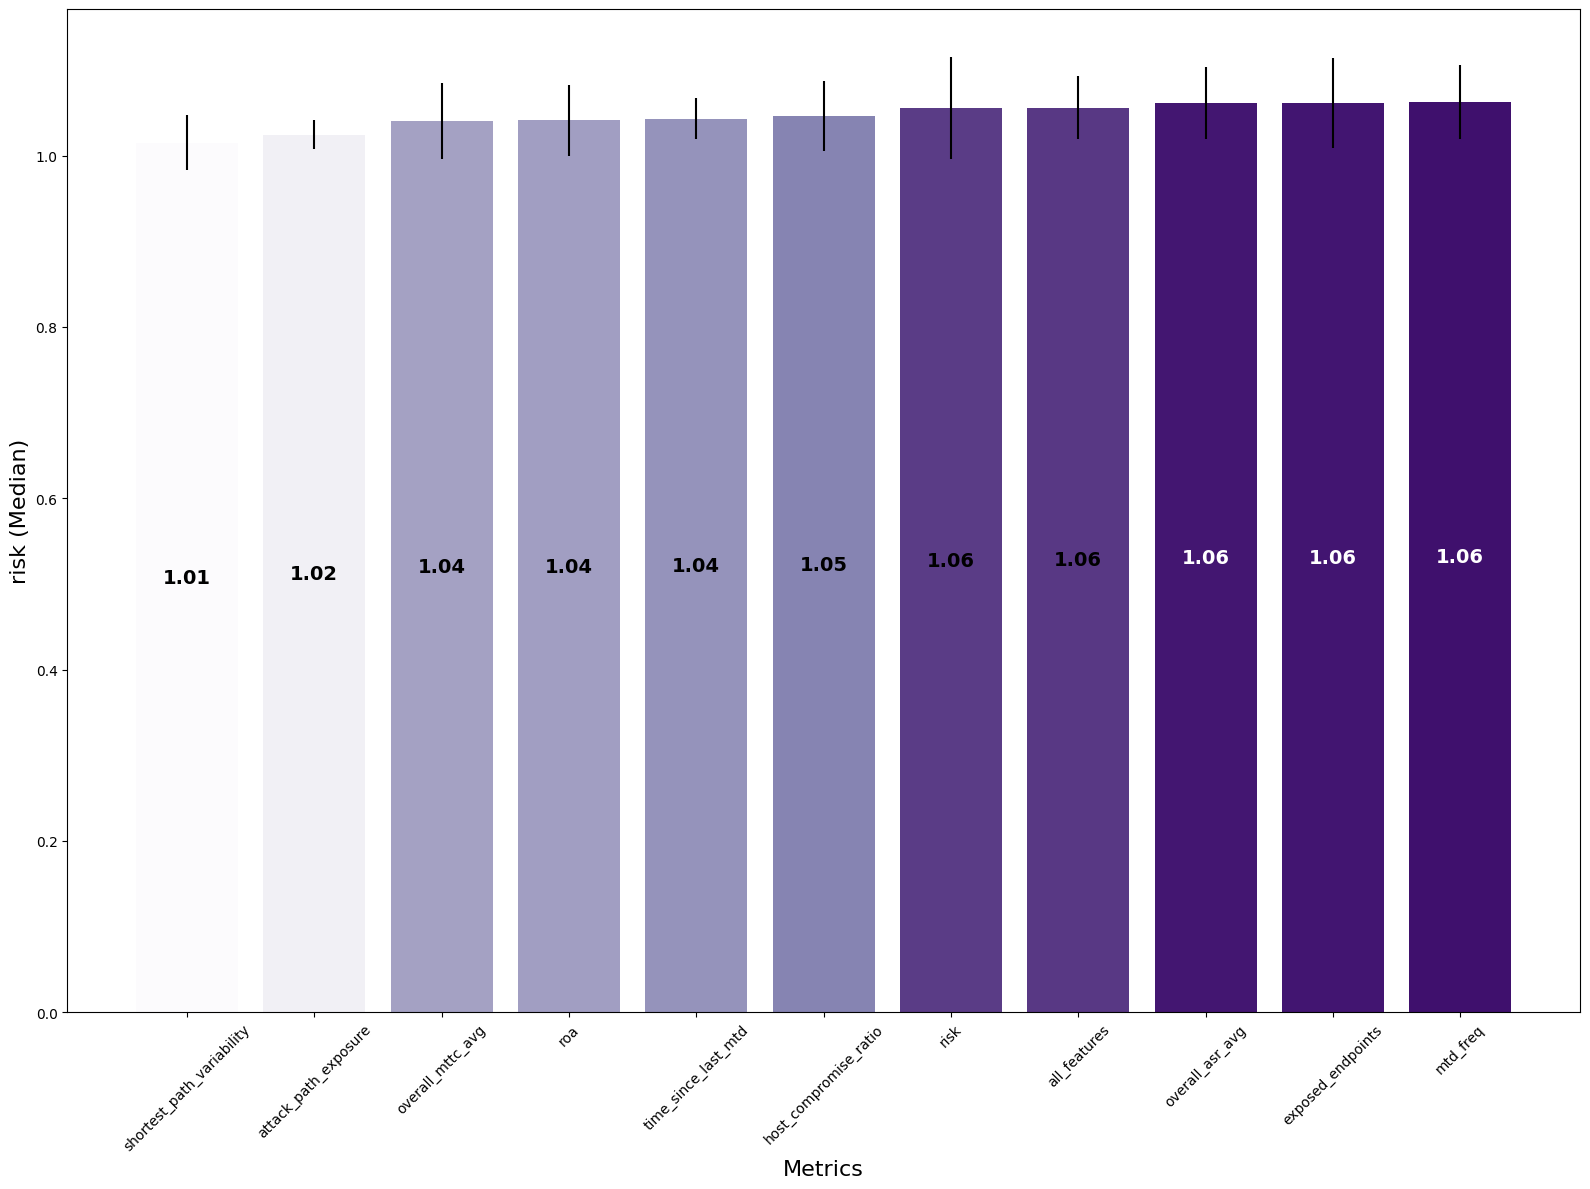

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a different colormap for each evaluation metric
colormap_dict = {
    "ASR": "Blues",
    "time_to_compromise": "Greens",
    "attack_path_exposure": "Reds",
    "ROA": "Oranges",
    "risk": "Purples"
}

evaluation_metrics = ["ASR", "time_to_compromise", "attack_path_exposure", "ROA", "risk"]

for evaluation_metric in evaluation_metrics:
    # Extract metric data for the current evaluation metric
    metric_data = data_copy.T[evaluation_metric].sort_values()

    # Normalize the data for shading using the specific range for the current metric set
    lower_percentile = np.percentile(metric_data.values, 5)
    upper_percentile = np.percentile(metric_data.values, 95)
    norm = plt.Normalize(vmin=lower_percentile, vmax=upper_percentile)  # Normalization for current metric set

    # Select the colormap for the current metric
    cmap = plt.get_cmap(colormap_dict[evaluation_metric])

    # Create a new figure
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Create a seaborn barplot with shades based on the individual metric values
    bar_colors = cmap(norm(metric_data.values))
    ax = sns.barplot(x=metric_data.index, y=metric_data.values, palette=bar_colors)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add numerical values in the center of the bars
    for i, value in enumerate(metric_data.values):
        # Set text color: dark bars get white text, light bars get black text
        text_color = 'white' if norm(value) > 0.95 else 'black'
        ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=14, weight='bold')

    # Add error bars using standard deviations
    yerr = std_devs_df.T[evaluation_metric][:len(metric_data)]  # Ensure yerr length matches metric_data
    ax.errorbar(metric_data.index, metric_data.values, yerr=yerr, fmt='none', color='black')

    # Set title and labels
    plt.xlabel('Metrics', fontsize=16)
    plt.ylabel(f'{evaluation_metric} (Median)', fontsize=16)

    # Show the plot for the current metric
    plt.tight_layout()
    plt.savefig(f"{evaluation_metric}_Overview.png")
    plt.show()
